In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 12.9 MB/s eta 0:00:00


In [ ]:
# 한글
from konlpy.tag import Okt
from collections import Counter

# 영어
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

# NLTK 데이터 다운로드 (최초 한 번만 실행)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
index_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/korea_index.xls",index_col = 0)
index_df

,image_url,rank,appid
0,https://shared.akamai.steamstatic.com//store_i...,1,1049590
2,https://shared.akamai.steamstatic.com//store_i...,3,2995920
4,https://shared.akamai.steamstatic.com//store_i...,5,413150
6,https://shared.akamai.steamstatic.com//store_i...,7,2683150
8,https://shared.akamai.steamstatic.com//store_i...,9,108600
...,...,...,...
3588,https://shared.akamai.steamstatic.com//store_i...,3589,1241340
3590,https://shared.akamai.steamstatic.com//store_i...,3591,1420880
3592,https://shared.akamai.steamstatic.com//store_i...,3593,1130790
3594,https://shared.akamai.steamstatic.com//store_i...,3595,1104560


In [ ]:
cp_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/steam_list.CSV", sep = ",", index_col = 0, encoding = "cp949")
cp_df

,o,o.1,o.2,o.3,o.4,o.5,o.6,o.7,o.8,o.9,o.10,o.11,o.12,x,x.1
-,,,,,,,,,,,,,,,
-,한글 제목,영어 제목,게임 링크,출시년도,VR\n전용,On-Line\n전용,장르,개발사 / 개발자 1,개발사 / 개발자 2,개발사 / 개발자 3,배급사 1,배급사 2,배급사 3,x,기타
o,_전언:,_message:,https://store.steampowered.com/app/2659150/_me...,2023,x,x,"공포, 텍스트 어드벤처",TEAM 217,NaN,NaN,PsychoFlux Entertainment,NaN,NaN,NaN,https://m.post.naver.com/viewer/postView.naver...
o,11층,11F,https://store.steampowered.com/app/1847120/11F/,2024,x,x,"호러, 미스터리, 어드벤처",PUMPKIM,NaN,NaN,PUMPKIM,NaN,NaN,NaN,NaN
o,30일 어나더,30 Days Another,https://store.steampowered.com/app/2125870/30_...,2024Q4,x,x,멀티 엔딩 스토리 어드벤처,THE BRICKS GAMES,NaN,NaN,THE BRICKS GAMES,NaN,NaN,NaN,NaN
o,3분 영웅,3 Minute Heroes,https://store.steampowered.com/app/1475460/3_M...,2020,x,x,"타워 디펜스, 덱 빌딩, 로그라이크, 실시간 전략",Sinkhole Studio,NaN,NaN,Sinkhole Studio,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 파일 읽기
world_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/world_df.csv", sep = ",", index_col = 0) # 전세계 인기 인디 게임 정보
korea_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/korea_df.csv", sep = ",", index_col = 0) # 국내 인기 인디 게임 정보
cp_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/steam_list.CSV", sep = ",", index_col = 0, encoding = "cp949") # 국내 게임사가 제작한 스팀 게임

In [ ]:
# appid 컬럼을 문자열로 변환
korea_df['appid'] = korea_df['appid'].astype(str)
index_df['appid'] = index_df['appid'].astype(str)

# merge 수행
korea_df = pd.merge(korea_df, index_df[['appid', 'rank']], left_on='appid', right_on='appid', how='left')

In [ ]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2218
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            2219 non-null   int64  
 1   name             2208 non-null   object 
 2   developer        2168 non-null   object 
 3   publisher        2166 non-null   object 
 4   score_rank       0 non-null      float64
 5   positive         2219 non-null   int64  
 6   negative         2219 non-null   int64  
 7   userscore        2219 non-null   int64  
 8   owners           2219 non-null   object 
 9   average_forever  2219 non-null   int64  
 10  average_2weeks   2219 non-null   int64  
 11  median_forever   2219 non-null   int64  
 12  median_2weeks    2219 non-null   int64  
 13  price            2170 non-null   float64
 14  initialprice     2170 non-null   float64
 15  discount         2170 non-null   float64
 16  ccu              2219 non-null   int64  
 17  languages        21

In [ ]:
korea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            1444 non-null   object 
 1   name             1443 non-null   object 
 2   developer        1413 non-null   object 
 3   publisher        1317 non-null   object 
 4   score_rank       0 non-null      float64
 5   positive         1444 non-null   int64  
 6   negative         1444 non-null   int64  
 7   userscore        1444 non-null   int64  
 8   owners           1444 non-null   object 
 9   average_forever  1444 non-null   int64  
 10  average_2weeks   1444 non-null   int64  
 11  median_forever   1444 non-null   int64  
 12  median_2weeks    1444 non-null   int64  
 13  price            1413 non-null   float64
 14  initialprice     1413 non-null   float64
 15  discount         1413 non-null   float64
 16  ccu              1444 non-null   int64  
 17  languages     

In [ ]:
# 1. 한국과 전세계적으로도 성공한 게임
# 2. 해외에서는 주목받지 못했지만 국내에서는 성공한 게임
# 3. 국내에서는 주목받지 못했지만 해외에서는 성공한 게임

# 위의 결과들 중에서 한국 게임회사, 해외 게임회사 카운트 비교
# 국내에서 성공한 해외 게임, 국내에서 성공한 국내 게임
# 해외에서 성공한 국내 게임, 해외에서 성공한 해외 게임

# 결측치 확인

## 국내, 해외 모두 같은 column이므로 똑같은 전처리 실행

### score_rank

In [ ]:
# score_rank는 모두 NaN이므로 삭제
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2218
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            2219 non-null   int64  
 1   name             2208 non-null   object 
 2   developer        2168 non-null   object 
 3   publisher        2166 non-null   object 
 4   score_rank       0 non-null      float64
 5   positive         2219 non-null   int64  
 6   negative         2219 non-null   int64  
 7   userscore        2219 non-null   int64  
 8   owners           2219 non-null   object 
 9   average_forever  2219 non-null   int64  
 10  average_2weeks   2219 non-null   int64  
 11  median_forever   2219 non-null   int64  
 12  median_2weeks    2219 non-null   int64  
 13  price            2170 non-null   float64
 14  initialprice     2170 non-null   float64
 15  discount         2170 non-null   float64
 16  ccu              2219 non-null   int64  
 17  languages        21

In [ ]:
korea_df.drop(["score_rank"], axis=1, inplace = True)
world_df.drop(["score_rank"], axis=1, inplace = True)

### Price

In [ ]:
# 가격이 NaN인 경우에는 무료 게임
# 무료 게임의 경우 다른 정보들이 존재하지않아 삭제
korea_df[korea_df.price.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags,rank
3,2995920,It Takes Two - Friend's Pass,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],3.0
34,2206560,Zup! Q,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN
44,2451640,NaN,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],2709.0
89,2539820,LAPIDARY: Jewel Craft Simulator,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],1471.0
133,3163910,Home Deception,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN
191,2842590,Only Up !,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN
198,2689230,FURRY BACKROOMS,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN
224,3069470,Dollar,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],2389.0
331,3014380,낙화 -falling flower-,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN
332,2685220,Where Pandas 熊猫在哪里,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,[],NaN


In [ ]:
korea_df = korea_df.loc[korea_df["price"].notnull()]
world_df = world_df.loc[world_df["price"].notnull()]

### Rank

In [ ]:
# 게임 순위가 모두 0으로 처리되므로 순위와 관련된 column 모두 삭제
korea_df['median_forever'].value_counts()

,count
median_forever,
0,1413


In [ ]:
korea_df.drop(["average_forever","average_2weeks","median_forever","median_2weeks"], axis=1, inplace = True)
world_df.drop(["average_forever","average_2weeks","median_forever","median_2weeks"], axis=1, inplace = True)

<ipython-input-17-c5636ae93d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_df.drop(["average_forever","average_2weeks","median_forever","median_2weeks"], axis=1, inplace = True)
<ipython-input-17-c5636ae93d6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df.drop(["average_forever","average_2weeks","median_forever","median_2weeks"], axis=1, inplace = True)


### Name

In [ ]:
# name이 없는 경우 관련정보가 보이지 않아 행 삭제
world_df[world_df.name.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,tags


In [ ]:
korea_df = korea_df.loc[korea_df["name"].notnull()]
world_df = world_df.loc[world_df["name"].notnull()]

### Publisher

In [ ]:
# Publisher의 경우 결측치가 존재하지만 다른 열에 대한 정보가 존재하므로 삭제 x
world_df[world_df.publisher.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,tags
437,343780,Cat Goes Fishing,Cat5Games,NaN,11591,707,0,"500,000 .. 1,000,000",699.0,699.0,0.0,266,English,"Casual, Indie, Simulation","{'Fishing': 211, 'Cats': 159, 'Casual': 151, '..."
1069,40800,Super Meat Boy,Team Meat,NaN,32716,1868,0,"2,000,000 .. 5,000,000",1499.0,1499.0,0.0,73,"English, Russian",Indie,"{'Precision Platformer': 2108, 'Platformer': 1..."
1317,247350,Artemis Spaceship Bridge Simulator,NaN,NaN,419,46,0,"50,000 .. 100,000",699.0,699.0,0.0,0,English,"Action, Indie, Simulation","{'Simulation': 68, 'Indie': 48, 'Action': 43, ..."
1537,1645,Disciples II Galleans Return Scenario Editor,NaN,NaN,0,0,0,"0 .. 20,000",0.0,0.0,0.0,1,NaN,NaN,[]


### Tags, Genre

In [ ]:
# genre가 null이지만 tags 존재하는 경우에는 삭제 x(장르는 tags에서 가져 오는것)
world_df[world_df.genre.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,tags
355,1094780,Fisher Online,R-Age,R-Age,3232,563,0,"200,000 .. 500,000",1399.0,1399.0,0.0,835,"English, Russian, German",NaN,"{'Fishing': 47, 'Simulation': 25, 'Massively M..."
1032,1292940,Cube Escape Collection,Rusty Lake,Rusty Lake,6011,101,0,"200,000 .. 500,000",499.0,499.0,0.0,52,"English, French, Italian, German, Spanish - Sp...",NaN,"{'Puzzle': 119, 'Point & Click': 95, 'Mystery'..."
1128,1215390,Animal Revolt Battle Simulator,VDimension,"VDimension, Yodo1 Ltd.",5304,224,0,"200,000 .. 500,000",1499.0,1499.0,0.0,162,"English, French, Italian, German, Spanish - Sp...",NaN,"{'Indie': 448, 'Sandbox': 438, 'Simulation': 4..."
1426,1491670,Venba,Visai Games,Visai Games,1477,92,0,"100,000 .. 200,000",1499.0,1499.0,0.0,5,English,NaN,"{'Casual': 320, 'Cooking': 319, 'Narrative': 3..."
1537,1645,Disciples II Galleans Return Scenario Editor,NaN,NaN,0,0,0,"0 .. 20,000",0.0,0.0,0.0,1,NaN,NaN,[]


In [ ]:
korea_df[korea_df.genre.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,tags,rank
46,2169090,Vampire Survivors Soundtrack,poncle,poncle,0,0,0,"0 .. 20,000",299.0,299.0,0.0,0,NaN,NaN,[],755.0
835,1292940,Cube Escape Collection,Rusty Lake,Rusty Lake,6011,101,0,"200,000 .. 500,000",499.0,499.0,0.0,52,"English, French, Italian, German, Spanish - Sp...",NaN,"{'Puzzle': 119, 'Point & Click': 95, 'Mystery'...",1305.0
965,2564710,Green Hell Official Soundtrack,Creepy Jar,Creepy Jar,0,0,0,"0 .. 20,000",99.0,99.0,0.0,0,NaN,NaN,[],1721.0


In [ ]:
korea_df = korea_df.dropna(subset = ["languages","genre"], how='all')
world_df = world_df.dropna(subset = ["languages","genre"], how='all')

In [ ]:
# tags와 genre는 비슷하므로 genre의 결측치를 tags key값으로 채우고 tags 삭제
korea_df['tags'] = korea_df['tags'].apply(ast.literal_eval)
world_df['tags'] = world_df['tags'].apply(ast.literal_eval)

def fill_genre_with_tags(row):
    if pd.isna(row['genre']):
        # 'tags'에서 첫 번째 key값을 가져와서 'genre'에 채우기
        tags_keys = list(row['tags'].keys())
        if tags_keys:
            return tags_keys[0]
    return row['genre']


In [ ]:
korea_df["genre"] = korea_df.apply(fill_genre_with_tags, axis=1)
world_df["genre"] = world_df.apply(fill_genre_with_tags, axis=1)

In [ ]:
korea_df.drop(["tags"], axis=1, inplace = True)
world_df.drop(["tags"], axis=1, inplace = True)

In [ ]:
korea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, 0 to 1443
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   appid         1411 non-null   object 
 1   name          1411 non-null   object 
 2   developer     1411 non-null   object 
 3   publisher     1315 non-null   object 
 4   positive      1411 non-null   int64  
 5   negative      1411 non-null   int64  
 6   userscore     1411 non-null   int64  
 7   owners        1411 non-null   object 
 8   price         1411 non-null   float64
 9   initialprice  1411 non-null   float64
 10  discount      1411 non-null   float64
 11  ccu           1411 non-null   int64  
 12  languages     1409 non-null   object 
 13  genre         1411 non-null   object 
 14  rank          756 non-null    float64
dtypes: float64(4), int64(4), object(7)
memory usage: 176.4+ KB


In [ ]:
korea_df[korea_df.languages.isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank
251,1332420,Wingspan Soundtrack,Monster Couch,"Monster Couch, Stonemaier Games",0,0,0,"0 .. 20,000",999.0,999.0,0.0,0,NaN,"Casual, Indie, Strategy",NaN
1389,1335190,Tales of the Neon Sea - Original Soundtrack,Palm Pioneer,Thermite Games,0,0,0,"0 .. 20,000",99.0,99.0,0.0,0,NaN,"Indie, RPG",NaN


In [ ]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2169 entries, 1 to 2218
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   appid         2169 non-null   int64  
 1   name          2169 non-null   object 
 2   developer     2168 non-null   object 
 3   publisher     2166 non-null   object 
 4   positive      2169 non-null   int64  
 5   negative      2169 non-null   int64  
 6   userscore     2169 non-null   int64  
 7   owners        2169 non-null   object 
 8   price         2169 non-null   float64
 9   initialprice  2169 non-null   float64
 10  discount      2169 non-null   float64
 11  ccu           2169 non-null   int64  
 12  languages     2169 non-null   object 
 13  genre         2169 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 254.2+ KB


In [ ]:
# 리뷰 데이터에 대한 정보를 확인하고 싶기에 리뷰개수가 총 100개가 되지 않는 게임에 대해서는 삭제
world_df[world_df["owners"] == "0 .. 20,000"].describe()

,appid,positive,negative,userscore,price,initialprice,discount,ccu
count,4.250000e+02,425.000000,425.000000,425.0,425.000000,425.000000,425.000000,425.000000
mean,1.908970e+06,221.689412,34.663529,0.0,1513.635294,1707.508235,12.555294,15.781176
std,7.213101e+05,379.177446,67.735872,0.0,4849.968816,4840.119956,22.676714,47.335630
min,3.290000e+04,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.304350e+06,61.000000,6.000000,0.0,679.000000,999.000000,0.000000,1.000000
50%,1.972460e+06,136.000000,17.000000,0.0,1199.000000,1499.000000,0.000000,4.000000
75%,2.479840e+06,294.000000,40.000000,0.0,1799.000000,1999.000000,20.000000,11.000000
max,3.111680e+06,6606.000000,1044.000000,0.0,99998.000000,99998.000000,90.000000,554.000000


In [ ]:
# 긍정 부정 비율이 한쪽으로 치우칠 수 있기에 중앙값을 기준으로 총 리뷰수가 적은 경우에는 해당 게임 삭제
world_df = world_df[(world_df["positive"] + world_df["negative"]) > 100]

In [ ]:
korea_df[korea_df["owners"] == "0 .. 20,000"].describe()

,positive,negative,userscore,price,initialprice,discount,ccu,rank
count,787.000000,787.000000,787.0,787.000000,787.000000,787.000000,787.000000,389.000000
mean,113.219822,19.814485,0.0,607.161372,711.292249,12.630241,5.607370,1589.647815
std,461.434924,100.776571,0.0,526.707994,558.200661,25.165897,69.067063,1003.855122
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,0.000000,0.0,199.000000,299.000000,0.000000,0.000000,749.000000
50%,0.000000,0.000000,0.0,499.000000,499.000000,0.000000,0.000000,1467.000000
75%,56.000000,9.000000,0.0,799.000000,999.000000,10.000000,0.000000,2327.000000
max,6606.000000,1629.000000,0.0,3599.000000,3999.000000,93.000000,1761.000000,3589.000000


In [ ]:
korea_df = korea_df[(korea_df["positive"] + korea_df["negative"]) > 50]

In [ ]:
korea_df

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank
0,1456940,Level Zero: Extraction,Doghowl Games,tinyBuild,1361,717,0,"100,000 .. 200,000",1999.0,1999.0,0.0,518,"English, French, German, Spanish - Spain, Japa...","Action, Adventure, Indie, Massively Multiplaye...",NaN
4,580731,911 Operator - Every Life Matters,Jutsu Games,Games Operators,51,15,0,"0 .. 20,000",599.0,599.0,0.0,0,"English, French, German, Spanish - Spain, Poli...","Casual, Indie, Simulation, Strategy",NaN
7,204371,Castle Crashers - Pink Knight Pack,The Behemoth,The Behemoth,428,5,0,"0 .. 20,000",99.0,99.0,0.0,0,"English, German, French, Italian, Korean, Span...","Action, Adventure, Casual, Indie, RPG",NaN
16,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,Tribute Games Inc.,"Dotemu, Gamera Games",12296,738,0,"200,000 .. 500,000",2499.0,2499.0,0.0,74,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Casual, Indie",NaN
18,1591420,Hmmsim Metro,Jeminie Interactive,Jeminie Interactive,1228,156,0,"20,000 .. 50,000",1999.0,1999.0,0.0,16,"English, Korean, Japanese, Simplified Chinese,...","Indie, Simulation, Early Access",311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,382140,SKYHILL,Mandragora,Daedalic Entertainment,3776,1097,0,"200,000 .. 500,000",99.0,999.0,90.0,52,"English, French, Italian, German, Spanish - Sp...","Adventure, Indie, Simulation",969.0
1433,334420,Out There: Ω Edition,"Mi-Clos Studio, FibreTigre","Mi-Clos Studio, WhisperGames, Fractale",1248,408,0,"200,000 .. 500,000",1499.0,1499.0,0.0,2,"English, French, German, Spanish - Spain, Russ...","Adventure, Indie, RPG, Strategy",NaN
1437,1136160,Internet Cafe Simulator,Cheesecake Dev,Cheesecake Dev,6976,2591,0,"200,000 .. 500,000",299.0,999.0,70.0,41,"English, French, German, Spanish - Spain, Simp...","Adventure, Indie, Simulation",1967.0
1440,773670,Delete,PONY,PONY,1458,60,0,"50,000 .. 100,000",199.0,199.0,0.0,3,"English, French, Italian, German, Spanish - Sp...","Casual, Indie",NaN


### DLC 게임 삭제

In [ ]:
# DLC, 사운드트랙과 같은 게임 정보들도 포함되어 있어, 해당 분석을 진행하는데에 하나의 게임에 대한 여러 정보가 들어 올 수있으므로 사전에 확인 후 제거
korea_df = korea_df[~korea_df['name'].str.contains("DLC|Soundtrack|Artbook|Pack|After Story", case=False, na=False)]
world_df = world_df[~world_df['name'].str.contains("DLC|Soundtrack|Artbook|Pack|After Story", case=False, na=False)]

## 파생변수

### 긍정 부정 비율

<Axes: xlabel='negative'>

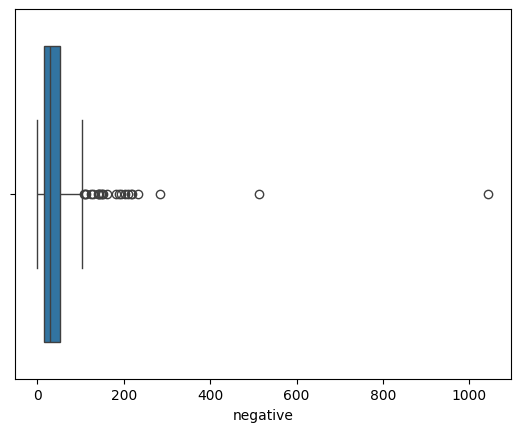

In [ ]:
sns.boxplot(data= world_df[world_df["owners"] == "0 .. 20,000"], x = "negative")

In [ ]:
world_df["review_ratio"] = world_df["positive"]/(world_df["positive"] + world_df["negative"])
korea_df["review_ratio"] = korea_df["positive"]/(korea_df["positive"] + korea_df["negative"])

<ipython-input-37-4ad7b6d49d82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_df["review_ratio"] = korea_df["positive"]/(korea_df["positive"] + korea_df["negative"])


In [ ]:
# 해외 기준 리뷰수
world_df.sort_values(["review_ratio"] , ascending = False)

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
1914,2878710,Desvelado,"Valentín Zacarías, Pablo Cuello, Joaquín Calvo",Vampi Team,137,0,0,"0 .. 20,000",699.0,699.0,0.0,0,"English, Spanish - Latin America, French, Germ...","Adventure, Casual, Indie",1.000000
1603,1718910,Prose & Codes,Hero Game Co LLC,Hero Game Co LLC,227,1,0,"0 .. 20,000",999.0,999.0,0.0,10,English,"Casual, Indie",0.995614
1705,790060,The Void Rains Upon Her Heart,Veyeral Games,The Hidden Levels,1354,8,0,"50,000 .. 100,000",1299.0,1299.0,0.0,27,English,"Action, Indie, Early Access",0.994126
1586,2882440,DEVIL BLADE REBOOT,SHIGATAKE GAMES,SHIGATAKE GAMES,492,3,0,"20,000 .. 50,000",1599.0,1599.0,0.0,4,"English, Simplified Chinese, Japanese, Traditi...","Action, Indie",0.993939
1392,1668190,Once Upon a Jester,Bonte Avond,Crunching Koalas,160,1,0,"0 .. 20,000",1499.0,1499.0,0.0,0,"English, French, German, Spanish - Spain, Dutc...","Adventure, Casual, Indie",0.993789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,954850,Kerbal Space Program 2,Intercept Games,Private Division,9570,16233,0,"500,000 .. 1,000,000",4999.0,4999.0,0.0,173,"English, French, Italian, German, Spanish - Sp...","Indie, Simulation, Early Access",0.370887
1488,2625510,Don't Shout Together,SinisterGames,SinisterGames,133,266,0,"20,000 .. 50,000",499.0,499.0,0.0,6,"English, French, Italian, German, Spanish - Sp...","Action, Indie, Simulation",0.333333
1166,108110,Starpoint Gemini,Little Green Men Games,Little Green Men Games,47,96,0,"200,000 .. 500,000",139.0,1399.0,90.0,0,"English, German","RPG, Simulation",0.328671
1724,1509230,Prop Hunt,HorseGames,HorseGames,47,125,0,"20,000 .. 50,000",249.0,999.0,75.0,1,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Massively Multiplayer, RPG, Sports",0.273256


In [ ]:
# 국내 기준 리뷰수
korea_df.sort_values(["review_ratio"] , ascending = False)

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
88,3062970,Fishlike,JJJ,JJJ,57,0,0,"0 .. 20,000",424.0,499.0,15.0,12,English,"Action, Casual, Indie",NaN,1.000000
1225,348040,This War of Mine: War Child Charity,11 bit studios,11 bit studios,1150,6,0,"0 .. 20,000",99.0,99.0,0.0,0,English,"Adventure, Indie, Simulation",1563.0,0.994810
1027,1055540,A Short Hike,adamgryu,adamgryu,16953,134,0,"200,000 .. 500,000",799.0,799.0,0.0,43,"English, French, Spanish - Latin America, Japa...","Adventure, Indie",NaN,0.992158
365,431730,Aseprite,David Capello,Igara Studio,18603,163,0,"1,000,000 .. 2,000,000",1999.0,1999.0,0.0,4717,"English, French, Italian, German, Korean, Russ...","Animation & Modeling, Design & Illustration, G...",175.0,0.991314
706,2754340,Lagoon Lounge 2 : The Secret Roommate,KAIJYU-09,KAIJYU-09,101,1,0,"0 .. 20,000",1399.0,1399.0,0.0,0,"English, Spanish - Spain, Spanish - Latin Amer...","Casual, Indie",NaN,0.990196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,931360,Land of Puzzles: Battles,Ripknot Systems,Ripknot Systems,28,47,0,"20,000 .. 50,000",74.0,499.0,85.0,0,English,"Casual, Indie",NaN,0.373333
534,1132410,Cyber OutRun,Kerim Kumbasar,Kerim Kumbasar,26,49,0,"0 .. 20,000",74.0,299.0,75.0,0,"English, Turkish","Action, Adventure, Casual, Indie, Racing",NaN,0.346667
1159,108110,Starpoint Gemini,Little Green Men Games,Little Green Men Games,47,96,0,"200,000 .. 500,000",139.0,1399.0,90.0,0,"English, German","RPG, Simulation",NaN,0.328671
1431,925690,Witch The Bloodlines,Kerim Kumbasar,Kerim Kumbasar,17,43,0,"0 .. 20,000",374.0,1499.0,75.0,1,"English, Korean, Russian, Turkish","Action, Adventure, Indie",NaN,0.283333


In [ ]:
korea_df["owners"] = korea_df['owners'].apply(lambda x: (int(x.split(" .. ")[0].replace(",", "")) + int(x.split(" .. ")[1].replace(",", "")))/2)
world_df["owners"] = world_df['owners'].apply(lambda x: (int(x.split(" .. ")[0].replace(",", "")) + int(x.split(" .. ")[1].replace(",", "")))/2)

<ipython-input-40-293e7c7f0d98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_df["owners"] = korea_df['owners'].apply(lambda x: (int(x.split(" .. ")[0].replace(",", "")) + int(x.split(" .. ")[1].replace(",", "")))/2)


In [ ]:
# 해외, 국내 공통적으로 높은 순위의 게임의 리뷰 보고, 국내만 높은거 보고, 해외만 높은 거보고, 똑같은 과정으로 낮은 순위의 게임도 확

In [ ]:
# 사분위수를 기준으로 q1이하면 비인기 게임, q3이상이면 인기 게임으로 구분
ko_q25 =korea_df["owners"].quantile(0.25)
ko_q75 =korea_df["owners"].quantile(0.75)

wo_q25 =world_df["owners"].quantile(0.25)
wo_q75 =world_df["owners"].quantile(0.75)

unpop_korea_df = korea_df[korea_df["owners"] <= ko_q25]
pop_korea_df = korea_df[korea_df["owners"] >= ko_q75]

unpop_world_df = world_df[world_df["owners"] <= wo_q25]
pop_world_df = world_df[world_df["owners"] >= wo_q75]

<Axes: xlabel='ccu'>

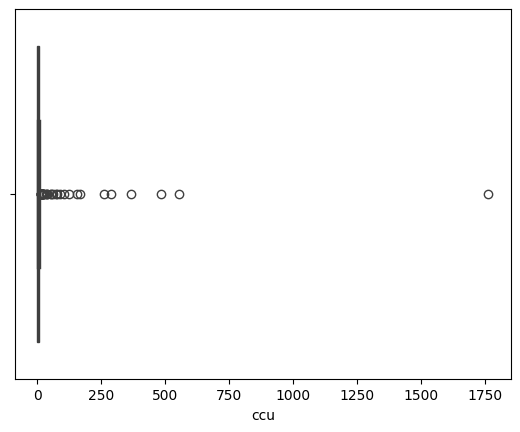

In [ ]:
# 국내 비인기 게임 동접자 박스 플랏
sns.boxplot(data = unpop_korea_df, x="ccu")

## 긍정, 부정 평가 비율 확인

### 전세계

#### 비인기

In [ ]:
# 전세계 비인기 게임 유저 긍정 평가 Top5
unpop_good_world = unpop_world_df.sort_values("review_ratio", ascending=False).head(10)
unpop_good_world

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
1914,2878710,Desvelado,"Valentín Zacarías, Pablo Cuello, Joaquín Calvo",Vampi Team,137,0,0,10000.0,699.0,699.0,0.0,0,"English, Spanish - Latin America, French, Germ...","Adventure, Casual, Indie",1.000000
1603,1718910,Prose & Codes,Hero Game Co LLC,Hero Game Co LLC,227,1,0,10000.0,999.0,999.0,0.0,10,English,"Casual, Indie",0.995614
1586,2882440,DEVIL BLADE REBOOT,SHIGATAKE GAMES,SHIGATAKE GAMES,492,3,0,35000.0,1599.0,1599.0,0.0,4,"English, Simplified Chinese, Japanese, Traditi...","Action, Indie",0.993939
1392,1668190,Once Upon a Jester,Bonte Avond,Crunching Koalas,160,1,0,10000.0,1499.0,1499.0,0.0,0,"English, French, German, Spanish - Spain, Dutc...","Adventure, Casual, Indie",0.993789
518,2648050,Sam & Max: The Devil's Playhouse,Skunkape Games,Skunkape Games,149,1,0,10000.0,1999.0,1999.0,0.0,41,"English, French, German, Russian","Adventure, Indie",0.993333
2174,1955110,Star Stuff,Ánimo Games Studio,Astra Logical,130,1,0,10000.0,1499.0,1499.0,0.0,1,"English, German, Japanese, Portuguese - Brazil...","Adventure, Casual, Indie, Strategy",0.992366
709,3107330,Nodebuster,Goblobin,Goblobin,497,4,0,35000.0,299.0,299.0,0.0,34,English,"Casual, Indie, Simulation, Strategy",0.992016
1195,1740300,Smushi Come Home,SomeHumbleOnion,Mooneye Studios,1827,15,0,35000.0,1999.0,1999.0,0.0,6,"English, French, German, Spanish - Spain, Japa...","Adventure, Casual, Indie, RPG",0.991857
1561,1295320,Can of Wormholes,munted finger,munted finger,360,3,0,10000.0,1999.0,1999.0,0.0,7,"English, French, Simplified Chinese",Indie,0.991736
1162,1592360,Kitten Burst,Lithodelphis,Lithodelphis,218,2,0,10000.0,2499.0,2499.0,0.0,3,English,"Adventure, Indie, Racing, RPG",0.990909


In [ ]:
# 전세계 비인기 게임 유저 리뷰 부정 평가
unpop_worst_world = unpop_world_df.sort_values("review_ratio", ascending = True).head(10)
unpop_worst_world

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
1883,2562240,Only Up!,MoreMoto Games,MoreMoto Games,22,181,0,10000.0,249.0,499.0,50.0,2,English,"Action, Casual, Indie, Massively Multiplayer, ...",0.108374
1724,1509230,Prop Hunt,HorseGames,HorseGames,47,125,0,35000.0,249.0,999.0,75.0,1,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Massively Multiplayer, RPG, Sports",0.273256
1488,2625510,Don't Shout Together,SinisterGames,SinisterGames,133,266,0,35000.0,499.0,499.0,0.0,6,"English, French, Italian, German, Spanish - Sp...","Action, Indie, Simulation",0.333333
1044,2558700,The Backrooms Deluxe,Lory Games,Lory Games,45,74,0,10000.0,0.0,0.0,0.0,9,English,"Adventure, Indie, Free To Play",0.378151
1728,2064810,CityDriver,ViewApp,Aerosoft GmbH,309,416,0,35000.0,2999.0,2999.0,0.0,11,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",0.426207
1577,370350,LOTUS-Simulator,Oriolus Software GmbH,Oriolus Software GmbH,310,371,0,35000.0,4999.0,4999.0,0.0,8,"English, German","Indie, Simulation, Early Access",0.455213
1371,936490,Counter Terrorist Agency,Play2Chill,"Games Operators, PlayWay S.A.",236,277,0,35000.0,1999.0,1999.0,0.0,2,"English, French, German, Spanish - Spain, Simp...","Action, Indie, Simulation, Strategy",0.460039
288,1283230,Autopsy Simulator,Woodland Games,Team17 Digital Ltd,444,521,0,35000.0,1999.0,2499.0,20.0,12,"English, German, Polish, Russian, Traditional ...","Indie, Simulation",0.460104
785,1847150,Touhou Genso Wanderer -FORESIGHT-,"AQUASTYLE, ankaa studio",Phoenixx Inc.,135,151,0,10000.0,3499.0,3499.0,0.0,11,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Indie, RPG",0.472028
847,1330560,Hairdresser Simulator,GameFormatic S.A.,Frozen Way,200,217,0,10000.0,1999.0,1999.0,0.0,8,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",0.479616


####인기

In [ ]:
# 전세계 인기 게임 유저 긍정 평가 Top5
pop_good_world = pop_world_df.sort_values("review_ratio", ascending = False).head(10)
pop_good_world

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
359,1089980,The Henry Stickmin Collection,PuffballsUnited,Innersloth,45418,615,0,1500000.0,1499.0,1499.0,0.0,137,English,"Adventure, Casual, Indie",0.986640
168,1118200,People Playground,mestiez,Studio Minus,254045,3548,0,7500000.0,999.0,999.0,0.0,7196,English,"Action, Casual, Indie, Simulation",0.986226
74,1794680,Vampire Survivors,poncle,poncle,230989,3513,0,7500000.0,499.0,499.0,0.0,4983,"English, French, Italian, German, Spanish - Sp...","Action, Casual, Indie, RPG",0.985019
465,774181,Rhythm Doctor,7th Beat Games,"7th Beat Games, indienova",19832,316,0,750000.0,1599.0,1599.0,0.0,86,"English, Simplified Chinese, Traditional Chine...","Indie, Early Access",0.984316
221,2231450,Pizza Tower,Tour De Pizza,Tour De Pizza,59872,954,0,1500000.0,1999.0,1999.0,0.0,612,"English, French, Italian, German, Spanish - Sp...","Action, Indie",0.984316
6,413150,Stardew Valley,ConcernedApe,ConcernedApe,739174,12646,0,35000000.0,1499.0,1499.0,0.0,66650,"English, German, Spanish - Spain, Japanese, Po...","Indie, RPG, Simulation",0.983179
96,1145360,Hades,Supergiant Games,Supergiant Games,262554,4502,0,7500000.0,2499.0,2499.0,0.0,3731,"English, French, Italian, German, Spanish - Sp...","Action, Indie, RPG",0.983142
507,420530,OneShot,Future Cat LLC,KOMODO,45731,795,0,750000.0,999.0,999.0,0.0,64,"English, Japanese, French, Spanish - Spain, Po...","Adventure, Casual, Indie",0.982913
536,460950,Katana ZERO,Askiisoft,Devolver Digital,65871,1305,0,3500000.0,1499.0,1499.0,0.0,126,"English, French, German, Spanish - Spain, Japa...","Action, Indie",0.980573
10,294100,RimWorld,Ludeon Studios,Ludeon Studios,189082,3869,0,7500000.0,3499.0,3499.0,0.0,26495,"English, French, German, Polish, Russian, Ital...","Indie, Simulation, Strategy",0.979948


In [ ]:
# 전세계 인기 게임 유저 부정 평가 Top5
pop_worst_world = pop_world_df.sort_values("review_ratio", ascending = True).head(10)
pop_worst_world

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
454,954850,Kerbal Space Program 2,Intercept Games,Private Division,9570,16233,0,750000.0,4999.0,4999.0,0.0,173,"English, French, Italian, German, Spanish - Sp...","Indie, Simulation, Early Access",0.370887
1125,1128000,Cube World,Picroma,Picroma,6836,11581,0,750000.0,1999.0,1999.0,0.0,20,English,"Adventure, Indie, RPG",0.371179
1208,591740,Sniper Fury,Gameloft,Gameloft,1310,1382,0,750000.0,0.0,0.0,0.0,96,"English, French, Italian, German, Spanish - Sp...","Action, Free To Play",0.486627
198,402710,Osiris: New Dawn,Fenix Fire Entertainment,Fenix Fire Entertainment,8079,6779,0,750000.0,1049.0,3499.0,70.0,32,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, RPG",0.543747
1562,344760,Reign Of Kings,Code}{atch,Code}{atch,8559,6401,0,750000.0,999.0,999.0,0.0,20,English,"Action, Adventure, Indie, RPG, Simulation",0.572126
1803,654990,Dude Simulator,Kiddy,Kiddy,1234,797,0,750000.0,69.0,499.0,86.0,1,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Simulation",0.607582
697,397900,Business Tour - Board Game with Online Multipl...,8Floor,8Floor,44765,28887,0,7500000.0,0.0,0.0,0.0,1005,"English, Russian, Turkish, Simplified Chinese,...","Adventure, Casual, Indie, Massively Multiplaye...",0.607791
1163,263540,Villagers and Heroes,Mad Otter Games,Mad Otter Games,2009,1295,0,750000.0,0.0,0.0,0.0,26,"English, German, Portuguese - Portugal, French...","Free To Play, Indie, Massively Multiplayer, RPG",0.608051
440,1180380,Stay Out,MOBITECH LLC,MOBITECH LLC,13376,8457,0,3500000.0,0.0,0.0,0.0,1512,"English, Russian, Simplified Chinese","Action, Indie, Massively Multiplayer, RPG, Fre...",0.612651
926,903950,Last Oasis,Donkey Crew,"Donkey Crew, Snail Games USA",14699,9095,0,1500000.0,989.0,2999.0,67.0,64,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Massively Multiplaye...",0.617761


### 국내

#### 인기

In [ ]:
# 국내 인기 게임 유저 긍정 평가 Top5
pop_good_korea = pop_korea_df.sort_values("review_ratio", ascending = False).head(10)
pop_good_korea

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
365,431730,Aseprite,David Capello,Igara Studio,18603,163,0,1500000.0,1999.0,1999.0,0.0,4717,"English, French, Italian, German, Korean, Russ...","Animation & Modeling, Design & Illustration, G...",175.0,0.991314
1184,1118200,People Playground,mestiez,Studio Minus,254045,3548,0,7500000.0,999.0,999.0,0.0,7196,English,"Action, Casual, Indie, Simulation",361.0,0.986226
230,1794680,Vampire Survivors,poncle,poncle,230989,3513,0,7500000.0,499.0,499.0,0.0,4983,"English, French, Italian, German, Spanish - Sp...","Action, Casual, Indie, RPG",69.0,0.985019
506,774181,Rhythm Doctor,7th Beat Games,"7th Beat Games, indienova",19832,316,0,750000.0,1599.0,1599.0,0.0,86,"English, Simplified Chinese, Traditional Chine...","Indie, Early Access",245.0,0.984316
471,413150,Stardew Valley,ConcernedApe,ConcernedApe,739174,12646,0,35000000.0,1499.0,1499.0,0.0,66650,"English, German, Spanish - Spain, Japanese, Po...","Indie, RPG, Simulation",5.0,0.983179
1030,1145360,Hades,Supergiant Games,Supergiant Games,262554,4502,0,7500000.0,2499.0,2499.0,0.0,3731,"English, French, Italian, German, Spanish - Sp...","Action, Indie, RPG",87.0,0.983142
596,460950,Katana ZERO,Askiisoft,Devolver Digital,65871,1305,0,3500000.0,1499.0,1499.0,0.0,126,"English, French, German, Spanish - Spain, Japa...","Action, Indie",119.0,0.980573
190,431960,Wallpaper Engine,Wallpaper Engine Team,Wallpaper Engine Team,798625,15902,0,35000000.0,399.0,399.0,0.0,96566,"English, German, Simplified Chinese, Polish, P...","Casual, Indie, Animation & Modeling, Design & ...",15.0,0.980477
612,433340,Slime Rancher,Monomi Park,Monomi Park,121628,2580,0,1500000.0,499.0,1999.0,75.0,1621,"English, French, German, Russian, Swedish, Sim...","Action, Adventure, Indie, Simulation",203.0,0.979228
1227,646570,Slay the Spire,Mega Crit,Mega Crit,160131,3530,0,7500000.0,849.0,2499.0,66.0,16632,"English, Simplified Chinese, French, German, K...","Indie, Strategy",139.0,0.978431


In [ ]:
# 국내 인기 게임 유저 부정 평가 Top5
pop_worst_korea = pop_korea_df.sort_values("review_ratio", ascending = True).head(10)
pop_worst_korea

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
265,508290,$1 Ride,BeHappy Studios,Back To Basics Gaming,451,481,0,750000.0,199.0,199.0,0.0,0,English,"Action, Casual, Indie",NaN,0.483906
323,424370,Wolcen: Lords of Mayhem,WOLCEN Studio,WOLCEN Studio,37795,29664,0,3500000.0,2999.0,2999.0,0.0,74,"English, German, French, Russian, Simplified C...","Action, Adventure, Indie, RPG",NaN,0.560266
683,654990,Dude Simulator,Kiddy,Kiddy,1234,797,0,750000.0,69.0,499.0,86.0,1,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Simulation",2787.0,0.607582
1048,319910,Trine 3: The Artifacts of Power,Frozenbyte,Frozenbyte,5462,3129,0,750000.0,483.0,2199.0,78.0,8,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie",1243.0,0.635782
1026,412880,Drift Streets Japan,JDM4iK Games,SA Industry,2240,1258,0,750000.0,49.0,499.0,90.0,9,English,"Action, Indie, Massively Multiplayer, Racing, ...",NaN,0.640366
1170,1812620,DSX,Paliverse,Paliverse,2273,1269,0,750000.0,799.0,799.0,0.0,6457,"English, French, Italian, German, Arabic, Bulg...",Utilities,393.0,0.641728
420,269210,Hero Siege,Panic Art Studios Ltd,Panic Art Studios Ltd,28426,12605,0,3500000.0,159.0,799.0,80.0,971,"English, Finnish, Portuguese - Brazil, Russian...","Action, Adventure, Indie, Massively Multiplaye...",125.0,0.692793
1175,838350,太吾绘卷 The Scroll Of Taiwu,ConchShip Games,ConchShip Games,41202,18197,0,3500000.0,1999.0,1999.0,0.0,939,"English, Not supported, Simplified Chinese","Adventure, Casual, Indie, RPG, Strategy, Early...",945.0,0.693648
1340,236150,Starpoint Gemini 2,Little Green Men Games,Little Green Men Games,2837,1241,0,750000.0,349.0,3499.0,90.0,7,"English, German, Russian, Polish, French","Action, RPG, Simulation",2721.0,0.695684
466,343360,Particula,Microblast Games,SA Industry,1663,717,0,750000.0,49.0,499.0,90.0,15,English,"Casual, Indie, Strategy",NaN,0.698739


#### 비인기

In [ ]:
# 국내 비인기 게임 유저 긍정 평가 Top5
# 국내 비인기 게임을 확인해보니 인기게임의 DLC도 포함되어 있는 것을 확인
unpop_good_korea = unpop_korea_df.sort_values("review_ratio", ascending = False).head(10)
unpop_good_korea

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
88,3062970,Fishlike,JJJ,JJJ,57,0,0,10000.0,424.0,499.0,15.0,12,English,"Action, Casual, Indie",NaN,1.000000
1225,348040,This War of Mine: War Child Charity,11 bit studios,11 bit studios,1150,6,0,10000.0,99.0,99.0,0.0,0,English,"Adventure, Indie, Simulation",1563.0,0.994810
706,2754340,Lagoon Lounge 2 : The Secret Roommate,KAIJYU-09,KAIJYU-09,101,1,0,10000.0,1399.0,1399.0,0.0,0,"English, Spanish - Spain, Spanish - Latin Amer...","Casual, Indie",NaN,0.990196
705,1564790,Submachine: Legacy,Mateusz Skutnik,Mateusz Skutnik,1083,11,0,35000.0,2499.0,2499.0,0.0,7,English,"Adventure, Indie",NaN,0.989945
1231,642240,Lucy -The Eternity She Wished For- Ending Them...,"Modern Visual Arts Laboratory, SEO INSEOK",Modern Visual Arts Laboratory,94,1,0,10000.0,199.0,199.0,0.0,0,"English, Korean, Japanese, Russian, Simplified...","Casual, Indie, Simulation",NaN,0.989474
1036,1420810,Touhou Kaeizuka ～ Phantasmagoria of Flower View.,上海アリス幻樂団,"Mediascape Co., Ltd.",230,3,0,35000.0,1499.0,1499.0,0.0,0,Japanese,"Action, Indie",NaN,0.987124
832,937580,Touhou Kanjuden ~ Legacy of Lunatic Kingdom.,上海アリス幻樂団,"Mediascape Co., Ltd.",1216,19,0,35000.0,1499.0,1499.0,0.0,6,"English, Not supported, Japanese","Action, Indie",NaN,0.984615
167,352840,One Way Heroics Plus,Smoking WOLF,PLAYISM,126,2,0,10000.0,649.0,649.0,0.0,0,"English, Japanese","Indie, RPG",NaN,0.984375
201,960310,CrossCode - Ninja Skin,Radical Fish Games,"Deck13, Whisper Games, DANGEN Entertainment, M...",57,1,0,10000.0,99.0,99.0,0.0,0,"English, German, Simplified Chinese, Japanese,...","Indie, RPG",NaN,0.982759
1323,2394650,Crypt Custodian,Kyle Thompson,"Kyle Thompson, Top Hat Studios, Inc., H2 Inter...",378,7,0,10000.0,1699.0,1999.0,15.0,286,"English, French, German, Spanish - Spain, Port...",Adventure,191.0,0.981818


In [ ]:
unpop_worst_korea = unpop_korea_df.sort_values("review_ratio", ascending = True).head(10)
unpop_worst_korea

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
449,2562240,Only Up!,MoreMoto Games,MoreMoto Games,22,181,0,10000.0,249.0,499.0,50.0,2,English,"Action, Casual, Indie, Massively Multiplayer, ...",3277.0,0.108374
1431,925690,Witch The Bloodlines,Kerim Kumbasar,Kerim Kumbasar,17,43,0,10000.0,374.0,1499.0,75.0,1,"English, Korean, Russian, Turkish","Action, Adventure, Indie",NaN,0.283333
534,1132410,Cyber OutRun,Kerim Kumbasar,Kerim Kumbasar,26,49,0,10000.0,74.0,299.0,75.0,0,"English, Turkish","Action, Adventure, Casual, Indie, Racing",NaN,0.346667
1305,931360,Land of Puzzles: Battles,Ripknot Systems,Ripknot Systems,28,47,0,35000.0,74.0,499.0,85.0,0,English,"Casual, Indie",NaN,0.373333
1174,1967220,No Return,BlameTech,Boltray Games,48,63,0,10000.0,1699.0,1699.0,0.0,0,"English, Simplified Chinese, Traditional Chine...","Adventure, Indie, RPG",NaN,0.432432
1314,1126770,My Bones Remastered,GDNomaD,GDNomaD,26,34,0,10000.0,49.0,99.0,51.0,0,English,"Casual, Indie, Simulation",NaN,0.433333
1201,1283230,Autopsy Simulator,Woodland Games,Team17 Digital Ltd,444,521,0,35000.0,1999.0,2499.0,20.0,12,"English, German, Polish, Russian, Traditional ...","Indie, Simulation",947.0,0.460104
170,1548090,Nether Nightmare,Rosa Special Studio,Rosa Special Studio,30,35,0,10000.0,79.0,399.0,80.0,0,English,"Action, Indie",NaN,0.461538
775,530060,Overcooked - The Lost Morsel,Ghost Town Games Ltd.,Team17 Digital Ltd,53,57,0,10000.0,499.0,499.0,0.0,0,"English, French, Italian, German, Spanish - Spain","Action, Casual, Indie, Simulation",1955.0,0.481818
951,2808270,Buckshot With Friends,yythgim,yythgim,39,37,0,10000.0,399.0,399.0,0.0,0,"English, French, German, Spanish - Spain, Japa...",Indie,NaN,0.513158


In [ ]:
# 'English'를 포함한 데이터 필터링
pop_korea_df[pop_korea_df['languages'].str.contains('English')]


,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
28,1116170,CyberCorp,Megame,Megame,104,9,0,3500000.0,1499.0,1499.0,0.0,20,"English, Russian, French, Italian, German, Spa...","Action, Adventure, Indie, RPG, Early Access",NaN,0.920354
32,1509960,PICO PARK,TECOPARK,TECOPARK,23820,2424,0,1500000.0,499.0,499.0,0.0,358,English,"Action, Casual, Indie",63.0,0.907636
35,1240210,There Is No Game: Wrong Dimension,Draw Me A Pixel,Draw Me A Pixel,21588,483,0,750000.0,1299.0,1299.0,0.0,78,"English, French, Spanish - Spain, Portuguese -...","Adventure, Casual, Indie",565.0,0.978116
43,1515210,The Past Within,Rusty Lake,Rusty Lake,13207,742,0,1500000.0,599.0,599.0,0.0,49,"English, French, Italian, German, Spanish - Sp...","Adventure, Indie",513.0,0.946806
50,559650,Witch It,Barrel Roll Games,Barrel Roll Games,16463,2079,0,1500000.0,1999.0,1999.0,0.0,156,"English, German, Simplified Chinese, Turkish, ...","Action, Casual, Indie",635.0,0.887876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1372810,Teamfight Manager,Team Samoyed,Team Samoyed,4652,714,0,750000.0,999.0,999.0,0.0,81,"Korean, English, Simplified Chinese, Tradition...","Indie, Simulation, Sports",395.0,0.866940
1411,535930,Two Point Hospital,Two Point Studios,SEGA,29537,2650,0,1500000.0,2999.0,2999.0,0.0,978,"English, French, Italian, German, Spanish - Sp...","Indie, Simulation",NaN,0.917669
1421,899770,Last Epoch,Eleventh Hour Games,Eleventh Hour Games,75456,22555,0,35000000.0,3499.0,3499.0,0.0,3381,"English, French, German, Korean, Polish, Portu...","Action, Adventure, Indie, RPG",75.0,0.769873
1429,774861,Project Winter,Other Ocean Interactive,Other Ocean Group,15553,3226,0,1500000.0,999.0,999.0,0.0,588,"English, Simplified Chinese, Spanish - Latin A...","Action, Adventure, Casual, Indie, Strategy",241.0,0.828212


In [ ]:
from collections import Counter

# 국내 인기 게임
genre_series = pop_korea_df['genre'].str.split(', ')
pop_korea_count = Counter([genre for sublist in genre_series for genre in sublist])

In [ ]:
del pop_korea_count["Indie"]

<ipython-input-55-24daf408e9f6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette = palette)  # 바로 리스트로 전달
<ipython-input-55-24daf408e9f6>:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(genres), y=list(counts), palette = palette)  # 바로 리스트로 전달


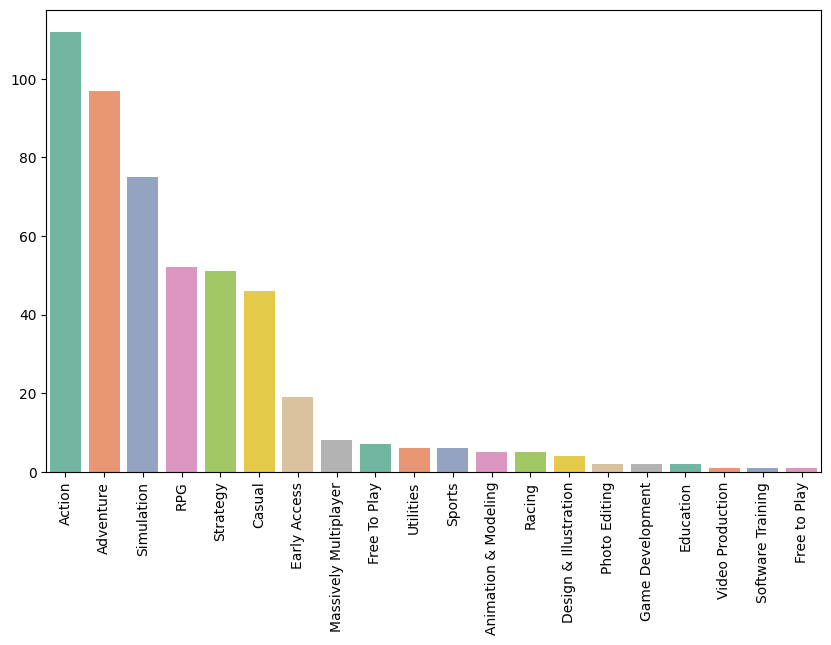

In [ ]:
# Counter 객체를 내림차순으로 정렬
sorted_genres = sorted(pop_korea_count.items(), key=lambda x: x[1], reverse=True)
genres, counts = zip(*sorted_genres)  # 장르와 카운트 리스트로 분리

# 그래프 그리기
plt.figure(figsize=(10,6))
palette = sns.color_palette("Set2")
sns.barplot(x=list(genres), y=list(counts), palette = palette)  # 바로 리스트로 전달
plt.xticks(rotation=90)
plt.show()

<ipython-input-56-246f1425f71a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts),palette = palette)  # 바로 리스트로 전달
<ipython-input-56-246f1425f71a>:13: UserWarning: 
The palette list has fewer values (8) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(genres), y=list(counts),palette = palette)  # 바로 리스트로 전달


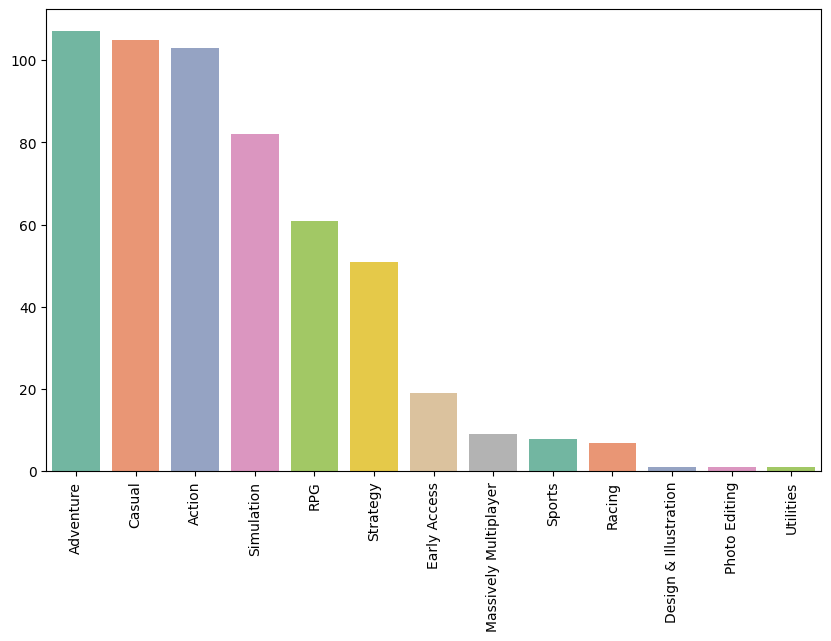

In [ ]:
# 국내 비인기 게임
genre_series = unpop_korea_df['genre'].str.split(', ')
unpop_korea_count = Counter([genre for sublist in genre_series for genre in sublist])
del unpop_korea_count["Indie"]

# Counter 객체를 내림차순으로 정렬
sorted_genres = sorted(unpop_korea_count.items(), key=lambda x: x[1], reverse=True)
genres, counts = zip(*sorted_genres)  # 장르와 카운트 리스트로 분리

# 그래프 그리기
plt.figure(figsize=(10,6))
palette = sns.color_palette("Set2")
sns.barplot(x=list(genres), y=list(counts),palette = palette)  # 바로 리스트로 전달
plt.xticks(rotation=90)
plt.show()

In [ ]:
genre_series

,genre
4,"[Casual, Indie, Simulation, Strategy]"
18,"[Indie, Simulation, Early Access]"
26,"[Casual, Indie]"
37,"[Adventure, Indie, Simulation]"
39,[Adventure]
...,...
1406,"[Casual, Indie, Simulation]"
1408,"[Indie, Simulation]"
1426,"[Action, Adventure, Indie, RPG, Early Access]"
1428,"[Adventure, Indie, RPG]"


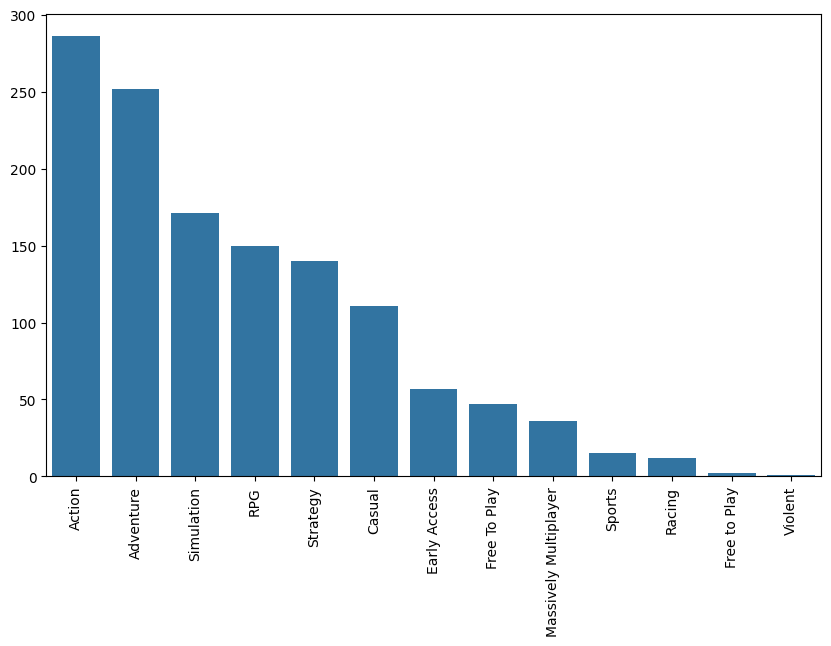

In [ ]:
# 해외 인기 게임
genre_series = pop_world_df['genre'].str.split(', ')
pop_world_count = Counter([genre for sublist in genre_series for genre in sublist])
del pop_world_count["Indie"]

# Counter 객체를 내림차순으로 정렬
sorted_genres = sorted(pop_world_count.items(), key=lambda x: x[1], reverse=True)
genres, counts = zip(*sorted_genres)  # 장르와 카운트 리스트로 분리

# 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(x=list(genres), y=list(counts))  # 바로 리스트로 전달
plt.xticks(rotation=90)
plt.show()

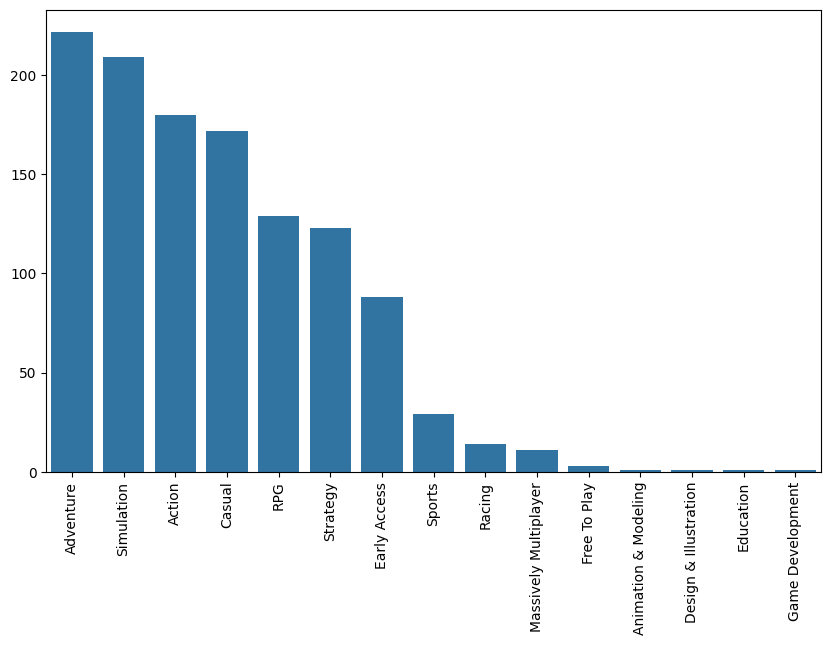

In [ ]:
# 해외 비인기 게임
genre_series = unpop_world_df['genre'].str.split(', ')
unpop_world_count = Counter([genre for sublist in genre_series for genre in sublist])
del unpop_world_count["Indie"]

# Counter 객체를 내림차순으로 정렬
sorted_genres = sorted(unpop_world_count.items(), key=lambda x: x[1], reverse=True)
genres, counts = zip(*sorted_genres)  # 장르와 카운트 리스트로 분리

# 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(x=list(genres), y=list(counts))  # 바로 리스트로 전달
plt.xticks(rotation=90)
plt.show()

### 장르별 긍정,부정 비율

<ipython-input-60-8211b73eaa15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_review['genre'] = df_genre_review['genre'].str.split(', ')
<ipython-input-60-8211b73eaa15>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='review_ratio',  data=genre_avg_review, palette=palette)


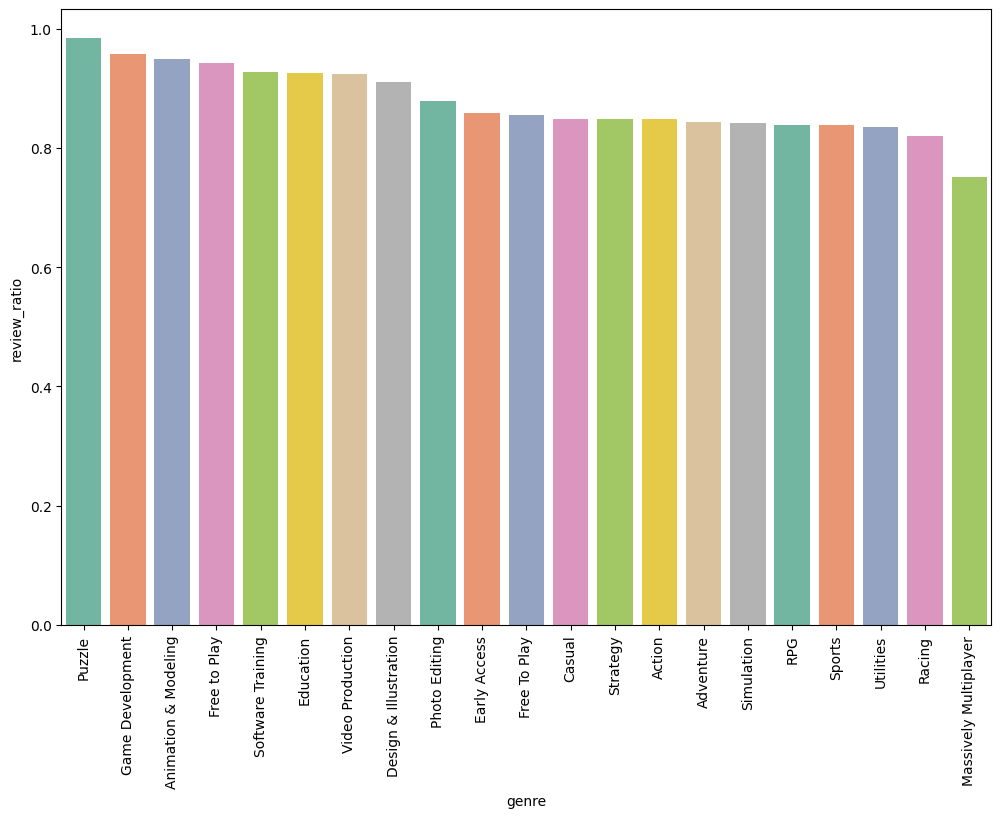

In [ ]:
df_genre_review = korea_df[['genre', 'review_ratio']]

# 장르를 분리하여 각 장르의 평점을 추출
df_genre_review['genre'] = df_genre_review['genre'].str.split(', ')
df_genre_review = df_genre_review.explode('genre')
df_genre_review = df_genre_review[df_genre_review["genre"] != "Indie"]

# 장르별 평균 평점 계산
genre_avg_review = df_genre_review.groupby('genre')['review_ratio'].mean().reset_index()

# 장르별 평균 평점을 내림차순으로 정렬
genre_avg_review = genre_avg_review.sort_values(by='review_ratio', ascending=False)


# 그래프 그리기
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(genre_avg_review))
sns.barplot(x='genre', y='review_ratio',  data=genre_avg_review, palette=palette)
plt.xticks(rotation=90)
plt.show()

<ipython-input-61-cf9149a2d6b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_review['genre'] = df_genre_review['genre'].str.split(', ')
<ipython-input-61-cf9149a2d6b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='review_ratio',  data=genre_avg_review, palette=palette)


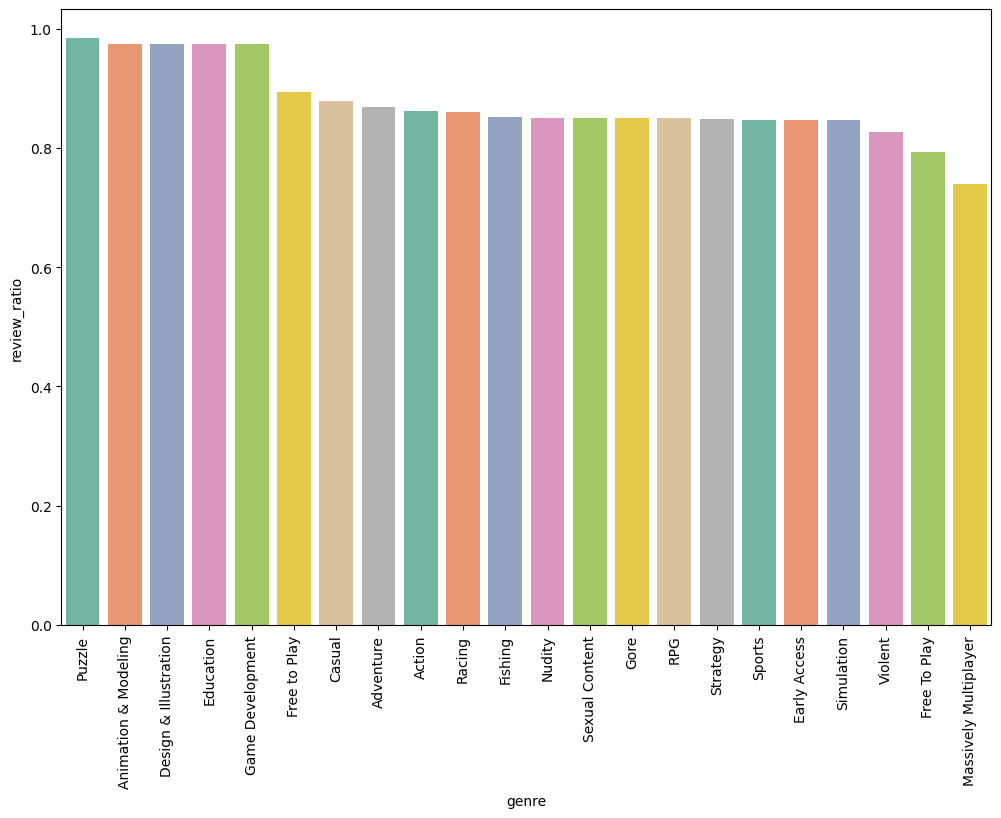

In [ ]:
df_genre_review = world_df[['genre', 'review_ratio']]

# 장르를 분리하여 각 장르의 평점을 추출
df_genre_review['genre'] = df_genre_review['genre'].str.split(', ')
df_genre_review = df_genre_review.explode('genre')
df_genre_review = df_genre_review[df_genre_review["genre"] != "Indie"]

# 장르별 평균 평점 계산
genre_avg_review = df_genre_review.groupby('genre')['review_ratio'].mean().reset_index()

# 장르별 평균 평점을 내림차순으로 정렬
genre_avg_review = genre_avg_review.sort_values(by='review_ratio', ascending=False)


# 그래프 그리기
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(genre_avg_review))
sns.barplot(x='genre', y='review_ratio',  data=genre_avg_review, palette=palette)
plt.xticks(rotation=90)
plt.show()

## 장르별 국내, 해외 긍부정 평가 지표 비교

<ipython-input-62-424d4593802b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world['genre'] = df_world['genre'].str.split(', ')
<ipython-input-62-424d4593802b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korea['genre'] = df_korea['genre'].str.split(', ')
<ipython-input-62-424d4593802b>:29: UserWarning: The palette list has more values (25) than needed (2), which may not be intended.
  sns.barplot(x='genre', y='review_ratio', hue='region', data=genre_avg_review, palette=palette)


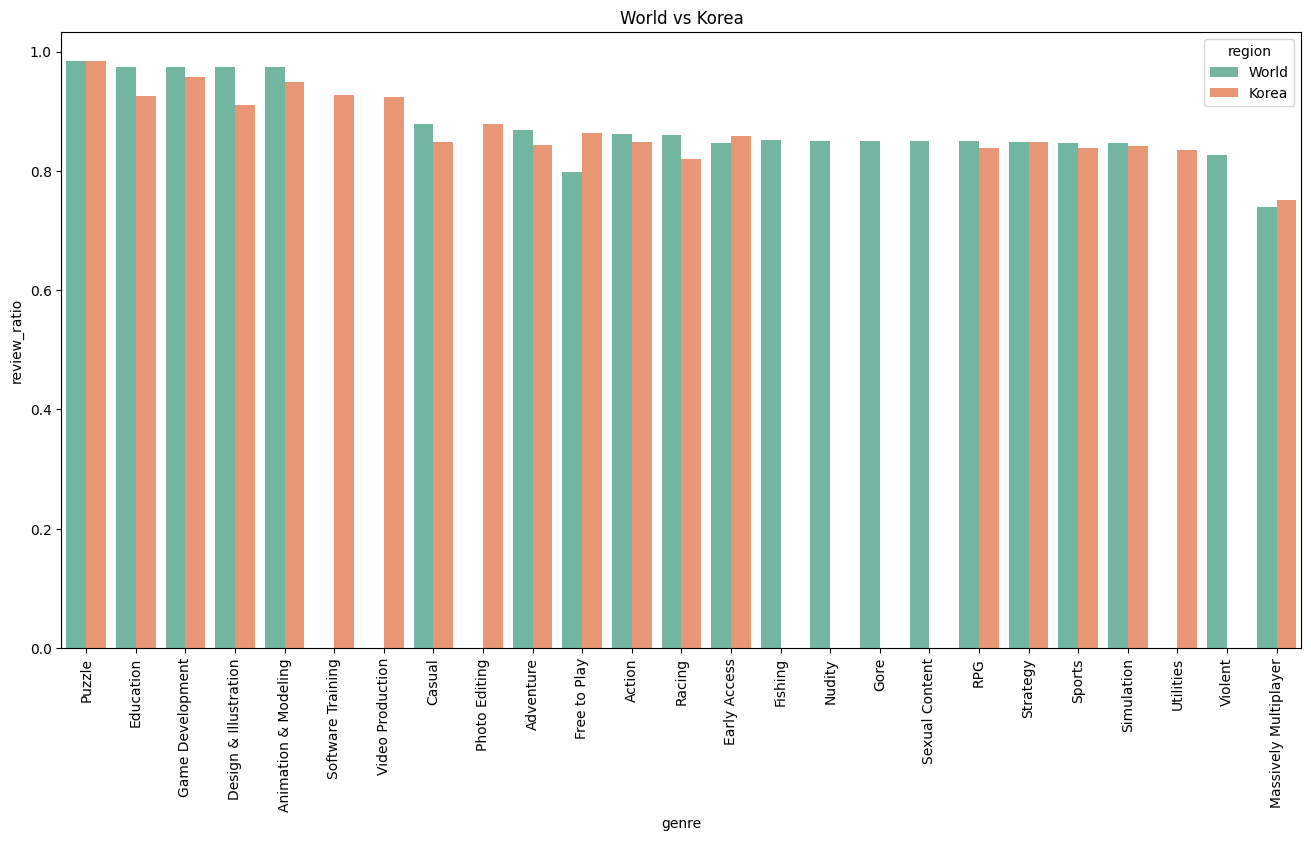

In [ ]:

# World 데이터 준비
df_world = world_df[['genre', 'review_ratio']]
df_world['genre'] = df_world['genre'].str.split(', ')
df_world = df_world.explode('genre')
df_world = df_world[df_world['genre'] != "Indie"]

# Korea 데이터 준비
df_korea = korea_df[['genre', 'review_ratio']]
df_korea['genre'] = df_korea['genre'].str.split(', ')
df_korea = df_korea.explode('genre')
df_korea = df_korea[df_korea['genre'] != "Indie"]

# 각각에 'region' 컬럼 추가
df_world['region'] = 'World'
df_korea['region'] = 'Korea'

# 두 데이터프레임 결합
df_combined = pd.concat([df_world, df_korea])
df_combined['genre'] = df_combined['genre'].replace('Free To Play', 'Free to Play')

# 장르별 평균 평점 계산
genre_avg_review = df_combined.groupby(['region', 'genre'])['review_ratio'].mean().reset_index()
genre_avg_review = genre_avg_review.sort_values(by='review_ratio', ascending=False)
# 그래프 그리기
plt.figure(figsize=(16, 8))
palette = sns.color_palette("Set2", len(genre_avg_review['genre'].unique()))

# Bar plot with hue to differentiate between World and Korea
sns.barplot(x='genre', y='review_ratio', hue='region', data=genre_avg_review, palette=palette)

plt.xticks(rotation=90)
plt.xlabel('genre')

plt.title("World vs Korea")
plt.show()


In [ ]:
# 국내 유저들은 무료 게임과 얼리억세스(정식출시전 임시로 출시한 게임) 게임에 대해서 평가가 더 좋음 ==> 왜지?

### 비인기

In [ ]:
# 1. 장르별 owners 정보를 준비
unpop_df_world_owners = unpop_world_df[['genre', 'owners']]
unpop_df_world_owners['genre'] = unpop_df_world_owners['genre'].str.split(', ')
unpop_df_world_owners = unpop_df_world_owners.explode('genre')
unpop_df_world_owners = unpop_df_world_owners[unpop_df_world_owners['genre'] != "Indie"]

# Korea 데이터 준비 (explode 후 필터링)
unpop_df_korea_owners = unpop_korea_df[['genre', 'owners']]
unpop_df_korea_owners['genre'] = unpop_df_korea_owners['genre'].str.split(', ')
unpop_df_korea_owners = unpop_df_korea_owners.explode('genre')
unpop_df_korea_owners = unpop_df_korea_owners[unpop_df_korea_owners['genre'] != "Indie"]

# 각각에 'region' 컬럼 추가
unpop_df_world_owners['region'] = 'unpop_World'
unpop_df_korea_owners['region'] = 'unpop_Korea'

# 두 데이터프레임 결합
unpop_df_combined_owners = pd.concat([unpop_df_korea_owners, unpop_df_world_owners])

# 'Free To Play' 값 수정
unpop_df_combined_owners['genre'] = unpop_df_combined_owners['genre'].replace('Free To Play', 'Free to Play')

# 두 지역 모두에 존재하는 장르만 선택
genre_count_owners = unpop_df_combined_owners.groupby(['genre', 'region']).size().unstack(fill_value=0)
common_genres_owners = genre_count_owners[(genre_count_owners['unpop_World'] > 0) & (genre_count_owners['unpop_Korea'] > 0)].index
unpop_df_combined_filtered_owners = unpop_df_combined_owners[unpop_df_combined_owners['genre'].isin(common_genres_owners)]

# 장르별 owners 평균 계산
owners_avg = unpop_df_combined_filtered_owners.groupby(['region', 'genre'])['owners'].mean().reset_index()

<ipython-input-64-ed15e2877900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_df_world_owners['genre'] = unpop_df_world_owners['genre'].str.split(', ')
<ipython-input-64-ed15e2877900>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_df_korea_owners['genre'] = unpop_df_korea_owners['genre'].str.split(', ')


In [ ]:

# 2. 장르별 review_ratio 정보를 준비
unpop_df_world_review = unpop_world_df[['genre', 'review_ratio']]
unpop_df_world_review['genre'] = unpop_df_world_review['genre'].str.split(', ')
unpop_df_world_review = unpop_df_world_review.explode('genre')
unpop_df_world_review = unpop_df_world_review[unpop_df_world_review['genre'] != "Indie"]

# Korea 데이터 준비 (explode 후 필터링)
unpop_df_korea_review = unpop_korea_df[['genre', 'review_ratio']]
unpop_df_korea_review['genre'] = unpop_df_korea_review['genre'].str.split(', ')
unpop_df_korea_review = unpop_df_korea_review.explode('genre')
unpop_df_korea_review = unpop_df_korea_review[unpop_df_korea_review['genre'] != "Indie"]

# 각각에 'region' 컬럼 추가
unpop_df_world_review['region'] = 'unpop_World'
unpop_df_korea_review['region'] = 'unpop_Korea'

# 두 데이터프레임 결합
unpop_df_combined_review = pd.concat([unpop_df_korea_review, unpop_df_world_review])

# 두 지역 모두에 존재하는 장르만 선택
genre_count_review = unpop_df_combined_review.groupby(['genre', 'region']).size().unstack(fill_value=0)
common_genres_review = genre_count_review[(genre_count_review['unpop_World'] > 0) & (genre_count_review['unpop_Korea'] > 0)].index
unpop_df_combined_filtered_review = unpop_df_combined_review[unpop_df_combined_review['genre'].isin(common_genres_review)]

# 장르별 review_ratio 평균 계산
review_ratio_avg = unpop_df_combined_filtered_review.groupby(['region', 'genre'])['review_ratio'].mean().reset_index()

# 3. owners와 review_ratio 데이터를 결합하여 하나의 데이터프레임으로 만들기
# 각 region, genre로 기준으로 두 데이터프레임을 합친다.
unpop_genre_avg_review = pd.merge(owners_avg, review_ratio_avg, on=['region', 'genre'], how='inner')

# 데이터프레임을 정렬
unpop_genre_avg_review = unpop_genre_avg_review.sort_values(by=['owners', 'review_ratio'], ascending=False)

<ipython-input-65-0f267f5bee07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_df_world_review['genre'] = unpop_df_world_review['genre'].str.split(', ')
<ipython-input-65-0f267f5bee07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_df_korea_review['genre'] = unpop_df_korea_review['genre'].str.split(', ')


<ipython-input-66-cef7bb62ec83>:5: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.barplot(x='genre', y='owners', hue='region', data=unpop_genre_avg_review, palette=palette)


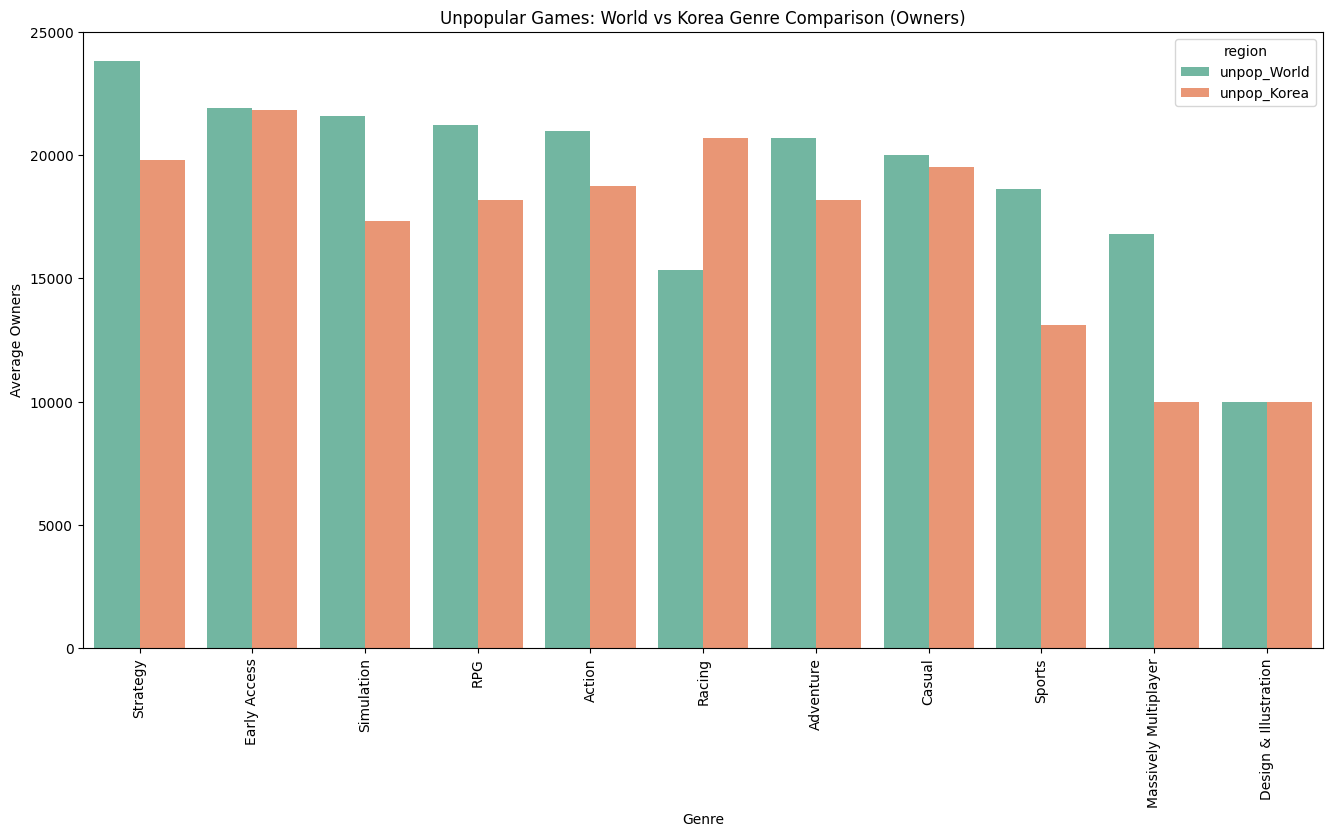

<ipython-input-66-cef7bb62ec83>:14: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.barplot(x='genre', y='review_ratio', hue='region', data=unpop_genre_avg_review, palette=palette)


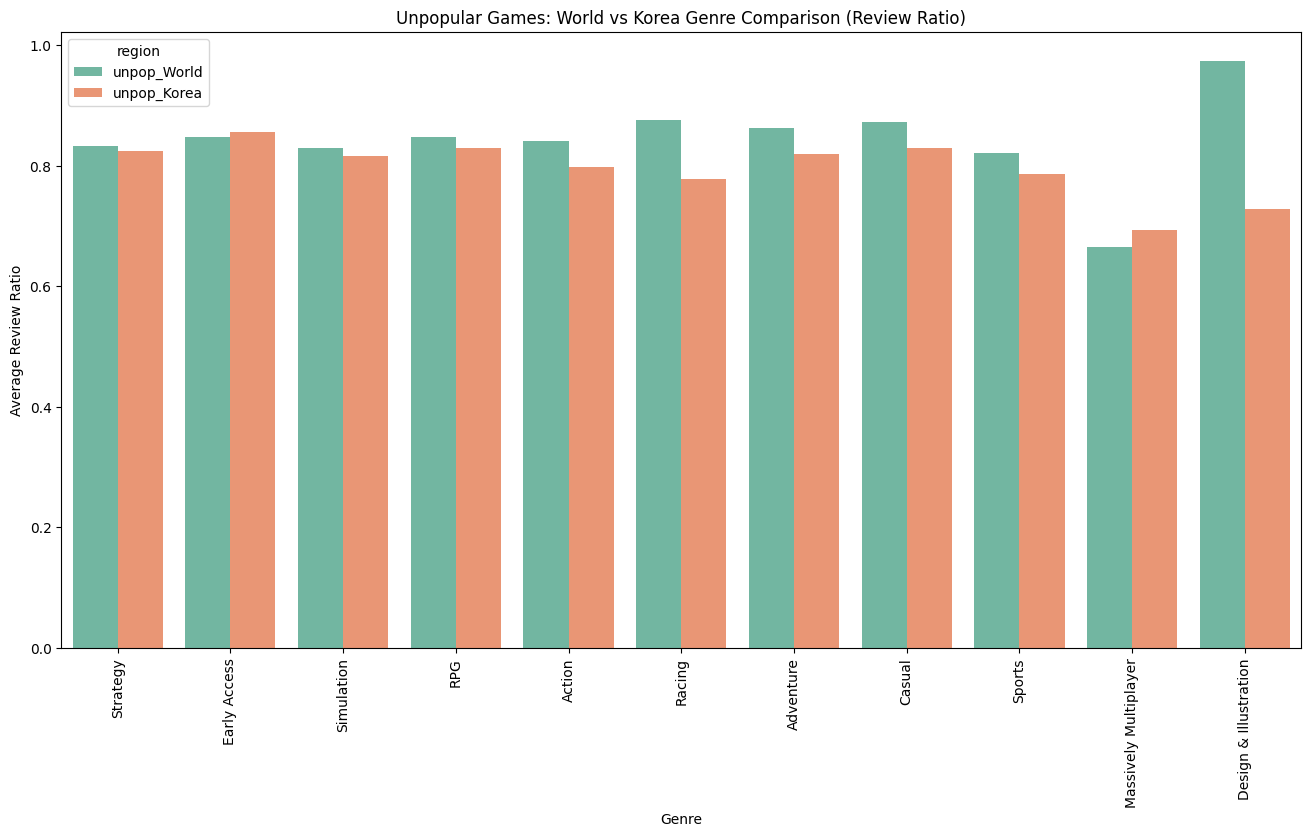

In [ ]:
plt.figure(figsize=(16, 8))
palette = sns.color_palette("Set2", len(unpop_genre_avg_review['genre'].unique()))

# Bar plot with hue to differentiate between World and Korea
sns.barplot(x='genre', y='owners', hue='region', data=unpop_genre_avg_review, palette=palette)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Owners')
plt.title("Unpopular Games: World vs Korea Genre Comparison (Owners)")
plt.show()

# review_ratio 그래프
plt.figure(figsize=(16, 8))
sns.barplot(x='genre', y='review_ratio', hue='region', data=unpop_genre_avg_review, palette=palette)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Review Ratio')
plt.title("Unpopular Games: World vs Korea Genre Comparison (Review Ratio)")
plt.show()

In [ ]:
# 1. 국내 유저 구매수가 해외 유저 구매수보다 높지만, 국내 유저 평가는 해외 유저 평가보다 낮은 경우
higher_owners_lower_reviews = unpop_genre_avg_review.pivot(index='genre', columns='region', values=['owners', 'review_ratio'])

# 조건을 적용한 데이터 추출
condition1 = (higher_owners_lower_reviews[('owners', 'unpop_Korea')] > higher_owners_lower_reviews[('owners', 'unpop_World')]) & \
             (higher_owners_lower_reviews[('review_ratio', 'unpop_Korea')] < higher_owners_lower_reviews[('review_ratio', 'unpop_World')])

result1 = higher_owners_lower_reviews[condition1]
result1

owners               review_ratio            
region   unpop_Korea   unpop_World  unpop_Korea unpop_World
genre                                                      
Racing  20714.285714  15357.142857     0.778466    0.875901

In [ ]:
# 2. 국내 유저 구매수가 낮지만, 국내 유저 평가는 해외 유저 평가보다 높은 경우
condition2 = (higher_owners_lower_reviews[('owners', 'unpop_Korea')] < higher_owners_lower_reviews[('owners', 'unpop_World')]) & \
             (higher_owners_lower_reviews[('review_ratio', 'unpop_Korea')] > higher_owners_lower_reviews[('review_ratio', 'unpop_World')])

result2 = higher_owners_lower_reviews[condition2]
result2

owners               review_ratio            
region                  unpop_Korea   unpop_World  unpop_Korea unpop_World
genre                                                                     
Early Access           21842.105263  21931.818182     0.856387    0.847939
Massively Multiplayer  10000.000000  16818.181818     0.693685    0.665463

### 인기

#### 긍부정 비율

#### 구매 유저수

In [ ]:
# 1. 장르별 owners 정보를 준비
pop_df_world = pop_world_df[['genre', 'owners']]
pop_df_world['genre'] = pop_df_world['genre'].str.split(', ')
pop_df_world = pop_df_world.explode('genre')
pop_df_world = pop_df_world[pop_df_world['genre'] != "Indie"]

# 한국 데이터 처리
pop_df_korea = pop_korea_df[['genre', 'owners']]
pop_df_korea['genre'] = pop_df_korea['genre'].str.split(', ')
pop_df_korea = pop_df_korea.explode('genre')
pop_df_korea = pop_df_korea[pop_df_korea['genre'] != "Indie"]

# 지역 컬럼 추가
pop_df_world['region'] = 'World'
pop_df_korea['region'] = 'Korea'

# 두 데이터프레임 결합
pop_df_combined = pd.concat([pop_df_korea, pop_df_world])

# 'Free To Play' 값 수정
pop_df_combined['genre'] = pop_df_combined['genre'].replace('Free To Play', 'Free to Play')

# 두 지역 모두에 존재하는 장르만 선택
genre_count = pop_df_combined.groupby(['genre', 'region']).size().unstack(fill_value=0)
common_genres = genre_count[(genre_count['World'] > 0) & (genre_count['Korea'] > 0)].index
pop_df_combined_filtered = pop_df_combined[pop_df_combined['genre'].isin(common_genres)]

# 장르별 owners의 평균 계산
owners_avg = pop_df_combined_filtered.groupby(['region', 'genre'])['owners'].mean().reset_index()

<ipython-input-69-f17f57e291df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_world['genre'] = pop_df_world['genre'].str.split(', ')
<ipython-input-69-f17f57e291df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_korea['genre'] = pop_df_korea['genre'].str.split(', ')


In [ ]:
# 2. 장르별 review_ratio 정보를 준비
pop_df_world_review = pop_world_df[['genre', 'review_ratio']]
pop_df_world_review['genre'] = pop_df_world_review['genre'].str.split(', ')
pop_df_world_review = pop_df_world_review.explode('genre')
pop_df_world_review = pop_df_world_review[pop_df_world_review['genre'] != "Indie"]

# 한국 데이터 처리 (review_ratio)
pop_df_korea_review = pop_korea_df[['genre', 'review_ratio']]
pop_df_korea_review['genre'] = pop_df_korea_review['genre'].str.split(', ')
pop_df_korea_review = pop_df_korea_review.explode('genre')
pop_df_korea_review = pop_df_korea_review[pop_df_korea_review['genre'] != "Indie"]

# 각각에 'region' 컬럼 추가
pop_df_korea_review['region'] = 'Korea'
pop_df_world_review['region'] = 'World'

# 두 데이터프레임 결합
pop_df_combined_review = pd.concat([pop_df_korea_review, pop_df_world_review])

# 두 지역 모두에 존재하는 장르만 선택
genre_count_review = pop_df_combined_review.groupby(['genre', 'region']).size().unstack(fill_value=0)
common_genres_review = genre_count_review[(genre_count_review['World'] > 0) & (genre_count_review['Korea'] > 0)].index
pop_df_combined_filtered_review = pop_df_combined_review[pop_df_combined_review['genre'].isin(common_genres_review)]

# 장르별 review_ratio 평균 계산
review_ratio_avg = pop_df_combined_filtered_review.groupby(['region', 'genre'])['review_ratio'].mean().reset_index()

# 3. owners와 review_ratio 데이터를 결합하여 하나의 데이터프레임으로 만들기
pop_genre_avg_review = pd.merge(owners_avg, review_ratio_avg, on=['region', 'genre'], how='inner')

# 데이터프레임을 정렬
pop_genre_avg_review = pop_genre_avg_review.sort_values(by=['owners', 'review_ratio'], ascending=False)

<ipython-input-70-12ba58959a61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_world_review['genre'] = pop_df_world_review['genre'].str.split(', ')
<ipython-input-70-12ba58959a61>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_korea_review['genre'] = pop_df_korea_review['genre'].str.split(', ')


In [ ]:
# 1. 국내 유저 구매수가 해외 유저 구매수보다 높지만, 국내 유저 평가는 해외 유저 평가보다 낮은 경우
higher_owners_lower_reviews_pop = pop_genre_avg_review.pivot(index='genre', columns='region', values=['owners', 'review_ratio'])

# 조건을 적용한 데이터 추출
condition3 = (higher_owners_lower_reviews_pop[('owners', 'Korea')] > higher_owners_lower_reviews_pop[('owners', 'World')]) & \
             (higher_owners_lower_reviews_pop[('review_ratio', 'Korea')] < higher_owners_lower_reviews_pop[('review_ratio', 'World')])

result3 = higher_owners_lower_reviews_pop[condition3]
result3

owners               review_ratio          
region         Korea         World        Korea     World
genre                                                    
Casual  3.114130e+06  2.722973e+06     0.896958  0.899096

In [ ]:
# 2. 국내 유저 구매수가 낮지만, 국내 유저 평가는 해외 유저 평가보다 높은 경우
condition4 = (higher_owners_lower_reviews_pop[('owners', 'Korea')] < higher_owners_lower_reviews_pop[('owners', 'World')]) & \
             (higher_owners_lower_reviews_pop[('review_ratio', 'Korea')] > higher_owners_lower_reviews_pop[('review_ratio', 'World')])

result4 = higher_owners_lower_reviews_pop[condition4]
result4

owners               review_ratio          
region                        Korea         World        Korea     World
genre                                                                   
Early Access           2.131579e+06  2.824561e+06     0.882730  0.848936
Free to Play           2.906250e+06  3.811224e+06     0.942904  0.870603
Massively Multiplayer  1.968750e+06  3.305556e+06     0.793252  0.776125

# 실험

In [ ]:
unpop_korea_df[unpop_korea_df['genre'].str.contains("Racing", case=False, na=False)]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
403,1101760,CRAZY DRIVER,SRS Games,SRS Games,117,33,0,35000.0,99.0,99.0,0.0,0,"English, French, Italian, German, Spanish - Sp...","Action, Casual, Indie, Racing, Sports",NaN,0.780000
534,1132410,Cyber OutRun,Kerim Kumbasar,Kerim Kumbasar,26,49,0,10000.0,74.0,299.0,75.0,0,"English, Turkish","Action, Adventure, Casual, Indie, Racing",NaN,0.346667
879,1918530,Pocket Stables,"Kairosoft Co.,Ltd","Kairosoft Co.,Ltd",110,10,0,10000.0,584.0,899.0,35.0,9,"English, Simplified Chinese, Traditional Chine...","Casual, Indie, Racing, Simulation, Sports, Str...",NaN,0.916667
982,1958600,Barro F22,SC Jogos,SC Jogos,303,45,0,35000.0,49.0,499.0,90.0,3,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Racing",1155.0,0.870690
985,2547860,6N23,Murtabongjo,GiLLZO,57,7,0,10000.0,99.0,99.0,0.0,0,English,"Action, Casual, Indie, Racing",3177.0,0.890625
1226,2203990,Commando Hero,Montee Games,Montee Games,161,21,0,35000.0,399.0,399.0,0.0,0,"English, Simplified Chinese, Turkish, Japanese...","Casual, Indie, Racing",NaN,0.884615
1237,964230,FUTURE GPX CYBER FORMULA SIN VIER,PROJECT YNP,PROJECT YNP,76,24,0,10000.0,2999.0,2999.0,0.0,1,"English, Japanese","Action, Indie, Racing, Sports",NaN,0.760000


In [ ]:
unpop_world_df[unpop_world_df['genre'].str.contains("Racing", case=False, na=False)]

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
502,1958600,Barro F22,SC Jogos,SC Jogos,303,45,0,35000.0,49.0,499.0,90.0,3,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Racing",0.870690
533,335070,VRC PRO,Virtual Racing Industries Ltd.,Virtual Racing Industries Ltd.,702,106,0,35000.0,4499.0,4499.0,0.0,31,English,"Action, Casual, Indie, Racing, Simulation, Sports",0.868812
666,2398030,FPV LOGIC,UT STUDIO,UT STUDIO,191,32,0,10000.0,1999.0,1999.0,0.0,22,"English, Simplified Chinese","Indie, Racing, Simulation, Early Access",0.856502
731,2824660,Old School Rally,Frozen Lake Games,Astrolabe Games,598,45,0,10000.0,999.0,999.0,0.0,8,"English, Italian, German, Greek, Russian, Japa...","Indie, Racing, Simulation, Early Access",0.930016
837,1273440,OverDrift Festival,OverDrift Crew,OverDrift Crew,867,209,0,10000.0,629.0,999.0,37.0,12,English,"Massively Multiplayer, Racing, Simulation, Sports",0.805762
1023,1511630,TrackDayR,MadCow S.r.l.,MadCow S.r.l.,564,123,0,10000.0,2499.0,2499.0,0.0,36,English,"Indie, Massively Multiplayer, Racing, Simulati...",0.820961
1162,1592360,Kitten Burst,Lithodelphis,Lithodelphis,218,2,0,10000.0,2499.0,2499.0,0.0,3,English,"Adventure, Indie, Racing, RPG",0.990909
1203,1918530,Pocket Stables,"Kairosoft Co.,Ltd","Kairosoft Co.,Ltd",110,10,0,10000.0,584.0,899.0,35.0,9,"English, Simplified Chinese, Traditional Chine...","Casual, Indie, Racing, Simulation, Sports, Str...",0.916667
1294,1247360,Grand Mountain Adventure: Wonderlands,Toppluva AB,Microids,301,24,0,10000.0,799.0,1999.0,60.0,3,"English, French, Italian, German, Spanish - Sp...","Adventure, Casual, Indie, Racing, Simulation, ...",0.926154
1321,1619570,Death Roads: Tournament,The Knights of Unity,"The Knights of Unity, Surefire.Games",502,111,0,10000.0,1499.0,1499.0,0.0,12,"English, French, German, Spanish - Spain, Simp...","Indie, Racing, Strategy",0.818923


In [ ]:
pop_world_df[pop_world_df['genre'].str.contains("Casual", case=False, na=False)].sort_values("review_ratio", ascending = True)

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
697,397900,Business Tour - Board Game with Online Multipl...,8Floor,8Floor,44765,28887,0,7500000.0,0.0,0.0,0.0,1005,"English, Russian, Turkish, Simplified Chinese,...","Adventure, Casual, Indie, Massively Multiplaye...",0.607791
605,260430,The Four Kings Casino and Slots,Digital Leisure Inc.,Digital Leisure Inc.,2602,1203,0,750000.0,0.0,0.0,0.0,81,"English, French, Italian, Russian, Swedish, Da...","Casual, Massively Multiplayer, Simulation, Fre...",0.683837
1421,314000,Pool Nation FX Lite,Cherry Pop Games,Cherry Pop Games,1615,621,0,750000.0,0.0,0.0,0.0,94,"English, French, Italian, German, Spanish - Spain","Casual, Free To Play, Indie, Simulation, Sport...",0.722272
2016,317470,Cubic Castles,Cosmic Cow LLC,Cosmic Cow LLC,3176,1110,0,750000.0,0.0,0.0,0.0,18,English,"Action, Adventure, Casual, Free To Play, Indie...",0.741017
1161,442070,Drawful 2,"Jackbox Games, Inc.","Jackbox Games, Inc.",2827,954,0,750000.0,999.0,999.0,0.0,123,"English, French, Italian, German, Spanish - Spain","Casual, Indie, Strategy",0.747686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1240210,There Is No Game: Wrong Dimension,Draw Me A Pixel,Draw Me A Pixel,21588,483,0,750000.0,1299.0,1299.0,0.0,78,"English, French, Spanish - Spain, Portuguese -...","Adventure, Casual, Indie",0.978116
507,420530,OneShot,Future Cat LLC,KOMODO,45731,795,0,750000.0,999.0,999.0,0.0,64,"English, Japanese, French, Spanish - Spain, Po...","Adventure, Casual, Indie",0.982913
74,1794680,Vampire Survivors,poncle,poncle,230989,3513,0,7500000.0,499.0,499.0,0.0,4983,"English, French, Italian, German, Spanish - Sp...","Action, Casual, Indie, RPG",0.985019
168,1118200,People Playground,mestiez,Studio Minus,254045,3548,0,7500000.0,999.0,999.0,0.0,7196,English,"Action, Casual, Indie, Simulation",0.986226


In [ ]:
cp_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/korean_steam_game.csv", sep = ",", index_col = 0) # 국내 게임사가 제작한 스팀 게임
cp_df = cp_df[["appid"]]

In [ ]:
cp_df

,appid
0,2659150
1,1847120
2,2125870
3,1475460
4,1483300
...,...
360,2078040
361,465130
362,1198810
363,1945560


In [ ]:
pop_korea_df.reset_index(drop=True,inplace=True)
unpop_korea_df.reset_index(drop=True,inplace=True)
pop_world_df.reset_index(drop=True,inplace=True)
unpop_korea_df.reset_index(drop=True,inplace=True)

In [ ]:
# 형식이 다르면 모두 문자열로 변환
cp_df['appid'] = cp_df['appid'].astype(str)
pop_korea_df['appid'] = pop_korea_df['appid'].astype(str)

pop_korea_merged_df = cp_df.merge(pop_korea_df.reset_index(), on='appid', how='inner')
pop_korea_merged_df.rename(columns={'index': 'pop_korea_index'}, inplace=True)
pop_korea_merged_df.sort_values(["pop_korea_index"], ascending = True)

<ipython-input-79-d3225467c431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_korea_df['appid'] = pop_korea_df['appid'].astype(str)


,appid,pop_korea_index,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
5,1147560,39,Skul: The Hero Slayer,SOUTHPAW GAMES,NEOWIZ,48517,3479,0,1500000.0,1999.0,1999.0,0.0,969,"English, Japanese, Korean, Simplified Chinese,...","Action, Indie",53.0,0.933091
0,1562700,42,SANABI,WONDER POTION,NEOWIZ,28141,743,0,750000.0,1499.0,1499.0,0.0,124,"English, Korean, Simplified Chinese, Russian, ...","Action, Adventure, Indie",39.0,0.974276
1,1049590,59,Eternal Return: Black Survival,Nimble Neuron,"Nimble Neuron, SapStaR Games",46498,12250,0,7500000.0,0.0,0.0,0.0,13635,"English, Japanese, Simplified Chinese, Korean,...","Indie, Strategy, Free To Play",1.0,0.791482
3,1256670,82,Library Of Ruina,ProjectMoon,ProjectMoon,26455,1827,0,750000.0,2999.0,2999.0,0.0,1214,"English, Japanese, Simplified Chinese, Korean","Indie, RPG, Strategy",91.0,0.935401
4,568220,151,Lobotomy Corporation | Monster Management Simu...,ProjectMoon,ProjectMoon,34770,2432,0,1500000.0,2499.0,2499.0,0.0,1298,"English, Korean, Japanese, Simplified Chinese,...","Indie, Simulation",127.0,0.934627
2,1372810,214,Teamfight Manager,Team Samoyed,Team Samoyed,4652,714,0,750000.0,999.0,999.0,0.0,81,"Korean, English, Simplified Chinese, Tradition...","Indie, Simulation, Sports",395.0,0.866940


In [ ]:
unpop_korea_df

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
0,580731,911 Operator - Every Life Matters,Jutsu Games,Games Operators,51,15,0,10000.0,599.0,599.0,0.0,0,"English, French, German, Spanish - Spain, Poli...","Casual, Indie, Simulation, Strategy",NaN,0.772727
1,1591420,Hmmsim Metro,Jeminie Interactive,Jeminie Interactive,1228,156,0,35000.0,1999.0,1999.0,0.0,16,"English, Korean, Japanese, Simplified Chinese,...","Indie, Simulation, Early Access",311.0,0.887283
2,2330500,BETON BRUTAL,Jan Malitschek,Jan Malitschek,1037,55,0,35000.0,699.0,699.0,0.0,14,English,"Casual, Indie",NaN,0.949634
3,712640,Don't Starve: Hamlet,Klei Entertainment,NaN,1181,129,0,10000.0,699.0,699.0,0.0,0,"English, Simplified Chinese","Adventure, Indie, Simulation",879.0,0.901527
4,301560,White Night,OSome Studio,Plug In Digital,275,91,0,35000.0,149.0,1499.0,90.0,0,"English, French, Italian, German, Spanish - Spain",Adventure,3123.0,0.751366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,344450,Goat Simulator: GoatZ,Gone North Games,Coffee Stain Publishing,480,84,0,10000.0,499.0,499.0,0.0,0,English,"Casual, Indie, Simulation",NaN,0.851064
269,461242,Euro Truck Simulator 2 - Window Flags,SCS Software,SCS Software,710,54,0,10000.0,99.0,99.0,0.0,0,"English, German, French, Italian, Korean, Span...","Indie, Simulation",NaN,0.929319
270,2286780,Aeruta,FromDawn Games,"GRAVITY GAME ARISE Co., Ltd.",241,37,0,10000.0,1499.0,1499.0,0.0,5,"Traditional Chinese, English, Japanese, Korean...","Action, Adventure, Indie, RPG, Early Access",NaN,0.866906
271,959890,Sister Travel,Inusuku,Kagura Games,557,62,0,35000.0,1499.0,1499.0,0.0,10,"English, Simplified Chinese","Adventure, Indie, RPG",NaN,0.899838


In [ ]:
# 형식이 다르면 모두 문자열로 변환
unpop_korea_df['appid'] = unpop_korea_df['appid'].astype(str)

# 병합 수행
unpop_korea_merged_df = cp_df.merge(unpop_korea_df.reset_index(), on='appid', how='inner')

# 컬럼 이름 변경
unpop_korea_merged_df.rename(columns={'index': 'unpop_korea_index'}, inplace=True)

# 정렬
unpop_korea_merged_df.sort_values(["unpop_korea_index"], ascending=False, inplace=True)

<ipython-input-81-cfd747623f60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_korea_df['appid'] = unpop_korea_df['appid'].astype(str)


In [ ]:
unpop_korea_merged_df

,appid,unpop_korea_index,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,rank,review_ratio
3,1042920,195,Unsouled,Megusta Game,NEOWIZ,250,65,0,10000.0,1999.0,1999.0,0.0,0,"English, Korean, German, Japanese, Simplified ...","Action, Adventure, Indie, RPG",NaN,0.793651
2,2803280,172,Dragon Is Dead,TeamSuneat,"PM Studios, inc.",182,52,0,10000.0,1999.0,1999.0,0.0,9,"English, Korean","Action, Indie, RPG, Early Access",519.0,0.777778
0,1454540,123,LAPIN,Studio Doodal,Studio Doodal,203,13,0,10000.0,1139.0,1899.0,40.0,1,"English, Korean, Japanese, Simplified Chinese,...","Action, Adventure, Indie",NaN,0.939815
1,2120310,92,Sagres,ooze,Kakehashi Games,145,31,0,10000.0,1999.0,1999.0,0.0,0,"English, Korean, Japanese, Simplified Chinese","Adventure, Indie, RPG, Simulation",NaN,0.823864


In [ ]:
unpop_world_df['appid'] = unpop_world_df['appid'].astype(str)
unpop_world_merged_df = cp_df.merge(unpop_world_df.reset_index(), on='appid', how='inner')
unpop_world_merged_df.rename(columns={'index': 'unpop_world_index'}, inplace=True)
unpop_world_merged_df.sort_values(["unpop_world_index"], ascending = False)

<ipython-input-83-ac21802f0513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpop_world_df['appid'] = unpop_world_df['appid'].astype(str)


,appid,unpop_world_index,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
2,2803280,1862,Dragon Is Dead,TeamSuneat,"PM Studios, inc.",182,52,0,10000.0,1999.0,1999.0,0.0,9,"English, Korean","Action, Indie, RPG, Early Access",0.777778
0,1454540,1690,LAPIN,Studio Doodal,Studio Doodal,203,13,0,10000.0,1139.0,1899.0,40.0,1,"English, Korean, Japanese, Simplified Chinese,...","Action, Adventure, Indie",0.939815
3,1573100,1661,Subterrain: Mines of Titan,Pixellore Inc,indie.io,399,112,0,10000.0,1999.0,1999.0,0.0,29,"English, Korean, Simplified Chinese, Russian","Indie, RPG",0.780822
1,1592520,1181,WitchSpring3 Re:Fine - The Story of Eirudy -,"KIWIWALKS, IKINAGAMES",KIWIWALKS,991,63,0,35000.0,1999.0,1999.0,0.0,5,"English, Simplified Chinese, Traditional Chine...","Casual, Indie, RPG",0.940228


In [ ]:
pop_world_df['appid'] = pop_world_df['appid'].astype(str)
pop_world_merged_df = cp_df.merge(pop_world_df.reset_index(), on='appid', how='inner')
pop_world_merged_df.rename(columns={'index': 'pop_world_index'}, inplace=True)
pop_world_merged_df.sort_values(["pop_world_index"], ascending = True)

<ipython-input-84-2290c0158b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_world_df['appid'] = pop_world_df['appid'].astype(str)


,appid,pop_world_index,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
2,1256670,95,Library Of Ruina,ProjectMoon,ProjectMoon,26455,1827,0,750000.0,2999.0,2999.0,0.0,1214,"English, Japanese, Simplified Chinese, Korean","Indie, RPG, Strategy",0.935401
3,568220,123,Lobotomy Corporation | Monster Management Simu...,ProjectMoon,ProjectMoon,34770,2432,0,1500000.0,2499.0,2499.0,0.0,1298,"English, Korean, Japanese, Simplified Chinese,...","Indie, Simulation",0.934627
4,1147560,217,Skul: The Hero Slayer,SOUTHPAW GAMES,NEOWIZ,48517,3479,0,1500000.0,1999.0,1999.0,0.0,969,"English, Japanese, Korean, Simplified Chinese,...","Action, Indie",0.933091
0,1562700,234,SANABI,WONDER POTION,NEOWIZ,28141,743,0,750000.0,1499.0,1499.0,0.0,124,"English, Korean, Simplified Chinese, Russian, ...","Action, Adventure, Indie",0.974276
1,1372810,354,Teamfight Manager,Team Samoyed,Team Samoyed,4652,714,0,750000.0,999.0,999.0,0.0,81,"Korean, English, Simplified Chinese, Tradition...","Indie, Simulation, Sports",0.866940


In [ ]:
pop_world_df

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
0,379430,Kingdom Come: Deliverance,Warhorse Studios,"Warhorse Studios, Prime Matter",110738,21947,0,3500000.0,299.0,2999.0,90.0,24689,"English, French, German, Spanish - Spain, Czec...","Action, Adventure, RPG",0.834593
1,632360,Risk of Rain 2,Hopoo Games,Gearbox Publishing,271665,18628,0,7500000.0,824.0,2499.0,67.0,29591,"English, French, Italian, German, Spanish - Sp...","Action, Indie",0.935830
2,413150,Stardew Valley,ConcernedApe,ConcernedApe,739174,12646,0,35000000.0,1499.0,1499.0,0.0,66650,"English, German, Spanish - Spain, Japanese, Po...","Indie, RPG, Simulation",0.983179
3,219990,Grim Dawn,Crate Entertainment,Crate Entertainment,87882,5844,0,7500000.0,499.0,2499.0,80.0,2458,"English, French, German, Spanish - Spain, Czec...","Action, Adventure, Indie, RPG",0.937648
4,739630,Phasmophobia,Kinetic Games,Kinetic Games,676179,28726,0,15000000.0,1399.0,1399.0,0.0,19425,"English, Portuguese - Portugal, Spanish - Spai...","Action, Indie, Early Access",0.959248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,686200,Door Kickers: Action Squad,"PixelShard, KillHouse Games",KillHouse Games,9235,498,0,750000.0,1399.0,1399.0,0.0,36,"English, French, German, Spanish - Spain, Russ...","Action, Casual, Indie, Simulation, Strategy",0.948834
542,668630,Tricolour Lovestory,HL-Galgame,SakuraGame,22688,4956,0,1500000.0,199.0,199.0,0.0,23,"English, Simplified Chinese","Adventure, Casual, Indie",0.820721
543,18500,Defense Grid: The Awakening,Hidden Path Entertainment,Hidden Path Entertainment,4804,189,0,750000.0,999.0,999.0,0.0,80,"English, French, Italian, German, Spanish - Spain","Indie, Strategy",0.962147
544,385800,NEKOPARA Vol. 0,NEKO WORKs,Sekai Project,16381,1036,0,750000.0,299.0,299.0,0.0,20,"English, Japanese, Traditional Chinese","Casual, Indie",0.940518


In [ ]:
pop_world_df.sort_values("owners", ascending=False)

,appid,name,developer,publisher,positive,negative,userscore,owners,price,initialprice,discount,ccu,languages,genre,review_ratio
213,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,498921,46517,0,75000000.0,0.0,0.0,0.0,21540,English,"Action, Adventure, Casual, Indie, Free To Play",0.914716
40,242760,The Forest,Endnight Games Ltd,Endnight Games Ltd,531344,25015,0,35000000.0,1999.0,1999.0,0.0,4884,"English, French, German, Czech, Finnish, Japan...","Action, Adventure, Indie, Simulation",0.955038
30,322330,Don't Starve Together,Klei Entertainment,Klei Entertainment,445456,20221,0,35000000.0,1499.0,1499.0,0.0,26139,"English, Simplified Chinese, French, Italian, ...","Action, Adventure, Indie, RPG, Simulation, Str...",0.956577
20,105600,Terraria,Re-Logic,Re-Logic,1294292,32709,0,35000000.0,999.0,999.0,0.0,26855,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, RPG",0.975351
19,346110,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",585245,116231,0,35000000.0,1499.0,1499.0,0.0,29461,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Massively Multiplaye...",0.834305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,260430,The Four Kings Casino and Slots,Digital Leisure Inc.,Digital Leisure Inc.,2602,1203,0,750000.0,0.0,0.0,0.0,81,"English, French, Italian, Russian, Swedish, Da...","Casual, Massively Multiplayer, Simulation, Fre...",0.683837
308,677120,Heroes of Hammerwatch,Crackshell,Crackshell,7782,1090,0,750000.0,1199.0,1199.0,0.0,140,"English, Simplified Chinese, Traditional Chinese","Action, Indie, RPG",0.877142
306,473690,Absolver,Sloclap,Devolver Digital,10267,3986,0,750000.0,2999.0,2999.0,0.0,98,"English, French, German, Spanish - Spain, Poli...","Action, Adventure, Indie",0.720340
304,506610,Five Nights at Freddy's: Sister Location,Scott Cawthon,Scott Cawthon,10310,1060,0,750000.0,799.0,799.0,0.0,28,English,"Action, Indie, Simulation",0.906772


In [ ]:
korea_df.to_csv("ko_df.csv")

In [ ]:
world_df.to_csv("world_df.csv")

In [ ]:
korea_df['region'] = 'Korea'
world_df['region'] = 'World'

# 두 데이터프레임을 위아래로 합치기
combined_df = pd.concat([korea_df, world_df], ignore_index=True)

<ipython-input-89-baa93327fb85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea_df['region'] = 'Korea'


In [ ]:
combined_df.to_csv("combined_game_df.csv")

# 리뷰 데이터

In [ ]:
import pandas as pd

In [ ]:
skul_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/skul.csv", index_col = 0)
lobo_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/lobotomy.csv", index_col = 0)
un_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/Unsouled.csv", index_col = 0)
dragon_df = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/dragon.csv", index_col = 0)

## 스컬

In [ ]:
import re

In [ ]:
skul_df['review'] = skul_df['review'].str.replace(r'^Posted: \d{1,2} \w+,\s*\d{4}', '', regex=True)
skul_df['review'] = skul_df['review'].str.replace(r'^\d{1,2} \w+, \d{4}', '', regex=True)
skul_df['Early'] = skul_df['review'].str.contains('Early Access Review', case=False, na=False)

In [ ]:
# 리뷰 데이터에서 "Early Access Review" 문자열 제거
skul_df['review'] = skul_df['review'].str.replace('Early Access Review', '', regex=False).str.strip()

# 리뷰 데이터에서 "Posted:"와 날짜 정보 제거
skul_df['review'] = skul_df['review'].apply(lambda x: re.sub(r'^Posted: \w+ \d{1,2}, \d{4}', '', x).strip())

skul_df['review'] = skul_df['review'].str.replace(r'\bPosted\b', '', regex=True).str.strip()

In [ ]:
skul_df["Early"].value_counts()

,count
Early,
False,10631
True,878


## 로보토미

In [ ]:
lobo_df['review'] = lobo_df['review'].str.replace(r'^Posted: \d{1,2} \w+,\s*\d{4}', '', regex=True)
lobo_df['review'] = lobo_df['review'].str.replace(r'^\d{1,2} \w+, \d{4}', '', regex=True)
lobo_df['Early'] = lobo_df['review'].str.contains('Early Access Review', case=False, na=False)

In [ ]:
# 리뷰 데이터에서 "Early Access Review" 문자열 제거
lobo_df['review'] = lobo_df['review'].str.replace('Early Access Review', '', regex=False).str.strip()

# 리뷰 데이터에서 "Posted:"와 날짜 정보 제거
lobo_df['review'] = lobo_df['review'].apply(lambda x: re.sub(r'^Posted: \w+ \d{1,2}, \d{4}', '', x).strip())

lobo_df['review'] = lobo_df['review'].str.replace(r'\bPosted\b', '', regex=True).str.strip()

In [ ]:
lobo_df["Early"].value_counts()

,count
Early,
False,15456
True,791


## 언소울

In [ ]:
# "Early Access Review"가 포함된 경우, "Early" 컬럼을 생성
un_df['Early'] = un_df['review'].str.contains('Early Access Review', case=False, na=False)

# "Posted:"와 다양한 날짜 정보 제거
un_df['review'] = un_df['review'].str.replace(r'^Posted: \d{1,2} \w+ \d{4}', '', regex=True).str.strip()
un_df['review'] = un_df['review'].str.replace(r'^Posted: \w+ \d{1,2}, \d{4}', '', regex=True).str.strip()
un_df['review'] = un_df['review'].str.replace(r'^Posted: \w+ \d{1,2}, \d{4}', '', regex=True).str.strip()
un_df['review'] = un_df['review'].str.replace(r'^Posted: \d{1,2} \w+, \d{4}', '', regex=True).str.strip()

# "Early Access Review" 문자열 제거
un_df['review'] = un_df['review'].str.replace('Early Access Review', '', regex=False).str.strip()

In [ ]:
un_df['review'] = un_df['review'].str.replace(r'\bPosted\b', '', regex=True).str.strip()

In [ ]:
un_df["Early"].value_counts()

,count
Early,
False,120
True,97


## dragon is dead

In [ ]:
# "Early Access Review"가 포함된 경우, "Early" 컬럼을 생성
dragon_df['Early'] = dragon_df['review'].str.contains('Access Review', case=False, na=False)

# "Posted:"와 날짜 정보 제거
dragon_df['review'] = dragon_df['review'].str.replace(r'^Posted: \d{1,2} \w+', '', regex=True).str.strip()

# "Early Access Review" 문자열 제거
dragon_df['review'] = dragon_df['review'].str.replace('Access Review', '', regex=False).str.strip()


In [ ]:
dragon_df['review'] = dragon_df['review'].str.replace(r'\bPosted\b', '', regex=True).str.strip()

# 영어 한글 각각에 대한 텍스트 전처리

In [ ]:
lobo_df["game"] = "lobotomy"
skul_df["game"] = "skul"
un_df["game"] = "unsouled"
dragon_df["game"] = "dragon_is_dead"

review = pd.concat([lobo_df, skul_df, un_df, dragon_df], ignore_index=True)
review.to_csv("review.csv")

In [ ]:
review.to_csv("review-1-1-1.csv")

In [ ]:
skul_df['year'] = skul_df['year'].astype('Int64')  # Convert to integer with support for NaN

# Filter years between 2016 and 2024 inclusive
skul_df = skul_df[skul_df['year'].between(2016, 2024, inclusive='both')]

In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to numbers using the dictionary
skul_df['month'] = skul_df['month'].map(month_mapping)

# Remove rows where 'month' is NaN (i.e., non-month values)
skul_df = skul_df.dropna(subset=['month'])

# Convert 'month' to integer
skul_df['month'] = skul_df['month'].astype(int)

In [ ]:
skul_df['year_month'] = skul_df['year'].astype(str) + '-' + skul_df['month'].astype(str).str.zfill(2)

skul_df

,review,review_type,language,year,month,Early,game,year_month
0,12월에 정발 예정이라 했잖아요...저 다음주에 입대해서 정식버전 못한다구요..ㅠㅠ,positive,korean,2021,1,False,skul,2021-01
1,물리트리를 가려고 하면 마법종결템이 나오고마법트리를 가려고 하면 물리종결템이 나오는 게임,positive,korean,2022,8,False,skul,2022-08
2,멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티내놔멀티...,positive,korean,2021,4,False,skul,2021-04
3,와 샌즈,positive,korean,2020,2,True,skul,2020-02
4,"초반에 나오는 일반, 레어 등급의 스컬들은 후반에 버려지기 일쑤입니다.그래서 말인데...",positive,korean,2020,6,True,skul,2020-06
...,...,...,...,...,...,...,...,...
11504,당장은 좀 아쉬운 게임. 후의 업데이트를 기대하나 당장은 추천하고 싶지 않다.,negative,korean,2020,2,True,skul,2020-02
11505,20%할인된 가격 15200원에 산다고 하더라도 게임에 비해 비싼감이 있다.로그라이...,negative,korean,2020,2,True,skul,2020-02
11506,솔직히 재밌는 로그라이트 게임 찾는거면 필구급임 잘만든거 맞음그런데 솔직히 말해서 ...,negative,korean,2020,2,False,skul,2020-02
11507,빙결에 대한 버그가 있습니다. 연회장 맵에서 도끼를 쓰는 몹이 빙결되면 충격파가 연...,negative,korean,2020,2,True,skul,2020-02


In [ ]:
ko_skul = skul_df[skul_df["language"] == "korean"]
en_skul = skul_df[skul_df["language"] == "english"]

### 긍정 부정 구분

In [ ]:
en_skul

,review,review_type,language,year,month,Early,game,year_month
2300,This is my Opinion on this Game. I havent play...,positive,english,2020,6,True,skul,2020-06
2302,please add co-op,positive,english,2023,1,False,skul,2023-01
2303,Product received for free»So take my head inst...,positive,english,2020,2,True,skul,2020-02
2305,"after beating the game, the replay value is le...",positive,english,2021,6,False,skul,2021-06
2306,200 character summarySkul is a challenging Rog...,positive,english,2020,3,True,skul,2020-03
...,...,...,...,...,...,...,...,...
10905,"It was pretty good in its early days, but now ...",negative,english,2020,4,False,skul,2020-04
10906,I want to like it because it has charm yet the...,negative,english,2020,11,False,skul,2020-11
10907,Some of the available skulls just feel complet...,negative,english,2020,7,True,skul,2020-07
10908,"OS: MacOS MojaveAfter Patch update, the game d...",negative,english,2020,5,True,skul,2020-05


In [ ]:
en_pos_skul = en_skul[en_skul["review_type"] == "positive"]
en_neg_skul = en_skul[en_skul["review_type"] == "negative"]
ko_pos_skul = ko_skul[ko_skul["review_type"] == "positive"]
ko_neg_skul = ko_skul[ko_skul["review_type"] == "negative"]

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# 영어 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
en_neg_skul['clean_review'] = en_neg_skul['review'].apply(preprocess_text)
en_pos_skul['clean_review'] = en_pos_skul['review'].apply(preprocess_text)

# 영어 토큰화
en_neg_skul['tokens'] = en_neg_skul['clean_review'].apply(word_tokenize)
en_pos_skul['tokens'] = en_pos_skul['clean_review'].apply(word_tokenize)

# 불용어 리스트
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

en_neg_skul['tokens'] = en_neg_skul['tokens'].apply(remove_stopwords)
en_pos_skul['tokens'] = en_pos_skul['tokens'].apply(remove_stopwords)

<ipython-input-113-3390782e6105>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_skul['clean_review'] = en_neg_skul['review'].apply(preprocess_text)
<ipython-input-113-3390782e6105>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['clean_review'] = en_pos_skul['review'].apply(preprocess_text)
<ipython-input-113-3390782e6105>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
irrelevant_words = ['game', 'skul', 'play', 'yes', 'no', 'run', 'item', 'really','skull', 'skulls']

# 불필요한 단어 제거 함수
def remove_irrelevant_words(tokens):
    return [word for word in tokens if word not in irrelevant_words]

# en_neg_skul과 en_pos_skul에 적용하여 불필요한 단어 제거
en_neg_skul['filtered_tokens'] = en_neg_skul['tokens'].apply(remove_irrelevant_words)
en_pos_skul['filtered_tokens'] = en_pos_skul['tokens'].apply(remove_irrelevant_words)

<ipython-input-114-5e974a320ac2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_skul['filtered_tokens'] = en_neg_skul['tokens'].apply(remove_irrelevant_words)
<ipython-input-114-5e974a320ac2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['filtered_tokens'] = en_pos_skul['tokens'].apply(remove_irrelevant_words)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    # 워드클라우드 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


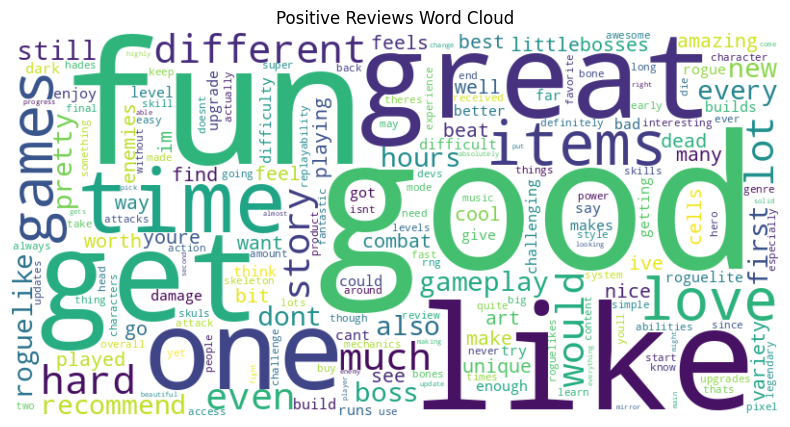

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_pos_skul['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

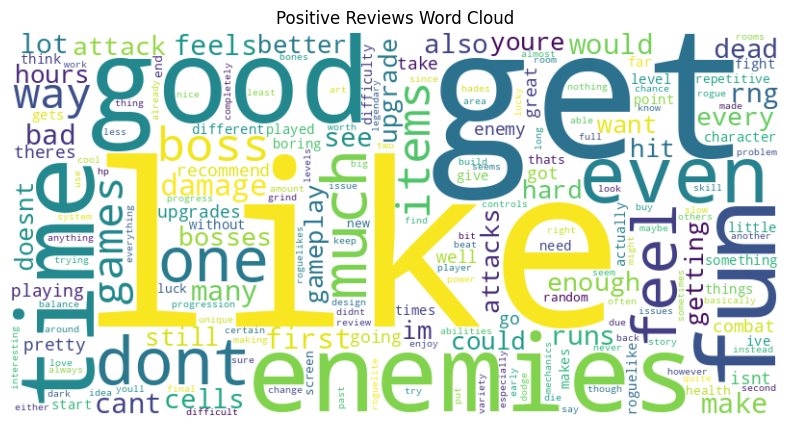

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_neg_skul['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_pos_skul['clean_review'] = ko_pos_skul['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_pos_skul['tokens'] = ko_pos_skul['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set( [
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_pos_skul['tokens'] = ko_pos_skul['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_pos_skul['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

<ipython-input-119-acd4c6dfd6d9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_pos_skul['clean_review'] = ko_pos_skul['review'].apply(preprocess_korean_text)
<ipython-input-119-acd4c6dfd6d9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_pos_skul['tokens'] = ko_pos_skul['clean_review'].apply(tokenize_korean)


[('갓', 1114), ('dlc', 543), ('give', 500), ('me', 500), ('제발', 461), ('창작', 420), ('마당', 387), ('겜', 365), ('아이템', 363), ('히', 320)]


<ipython-input-119-acd4c6dfd6d9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_pos_skul['tokens'] = ko_pos_skul['tokens'].apply(remove_stopwords)


In [ ]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,914 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


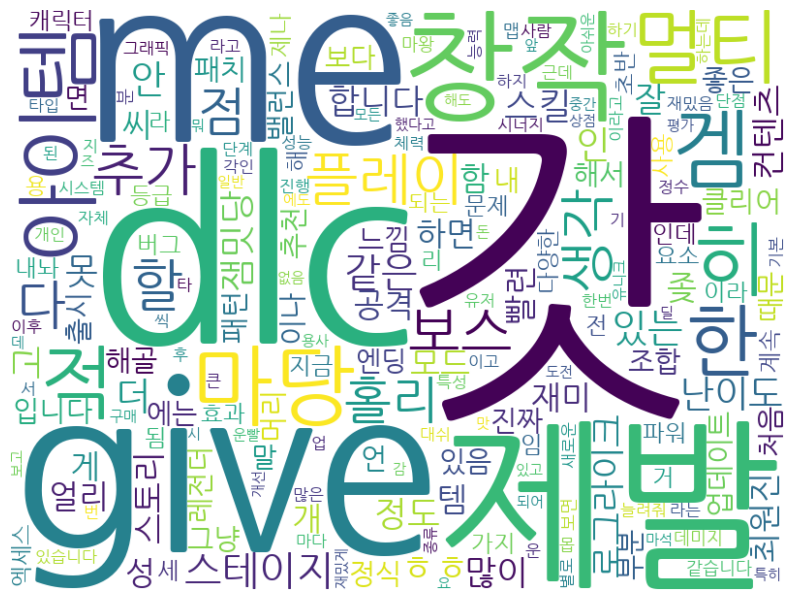

In [ ]:
def generate_wordcloud(word_freq):
    # 워드 클라우드 설정
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(word_freq)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.show()

# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_neg_skul['clean_review'] = ko_neg_skul['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_neg_skul['tokens'] = ko_neg_skul['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set( [
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임','한','할','다'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_neg_skul['tokens'] = ko_neg_skul['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_neg_skul['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

<ipython-input-123-2dbfb0f1b543>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_neg_skul['clean_review'] = ko_neg_skul['review'].apply(preprocess_korean_text)


[('아이템', 212), ('적', 199), ('안', 168), ('그냥', 142), ('생각', 142), ('못', 130), ('스테이지', 129), ('보스', 128), ('더', 119), ('인', 117)]


<ipython-input-123-2dbfb0f1b543>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_neg_skul['tokens'] = ko_neg_skul['clean_review'].apply(tokenize_korean)
<ipython-input-123-2dbfb0f1b543>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_neg_skul['tokens'] = ko_neg_skul['tokens'].apply(remove_stopwords)


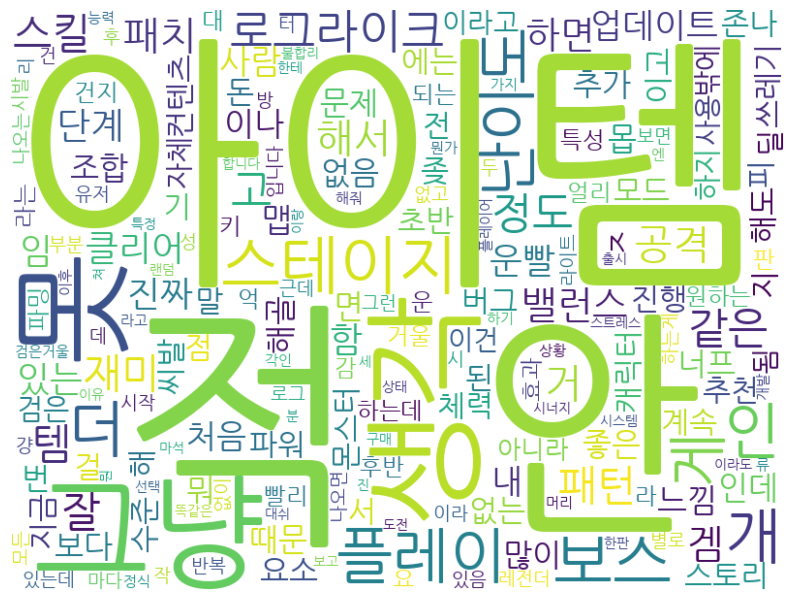

In [ ]:
# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
skul_games = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/skul_games.csv", index_col = 0)

In [ ]:
# lobo_games 데이터프레임에서 'title' 컬럼을 리스트로 변환
titles = skul_games['title'].tolist()

# 게임 제목을 소문자 변환 후 토큰화하는 함수
def preprocess_title(title):
    # 소문자 변환 후 특수문자 제거 및 토큰화 (단어별로 나누기)
    return re.findall(r'\b\w+\b', title.lower())

# 전처리된 제목 리스트
preprocessed_titles = [preprocess_title(title) for title in titles]

# 리뷰에 게임 제목이 포함되어 있는지 확인하는 함수
def contains_game_title(tokens):
    for preprocessed_title in preprocessed_titles:
        # 모든 토큰이 리뷰 내에 포함되었는지 확인
        if all(token in tokens for token in preprocessed_title):
            return True
    return False


In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_pos_skul['contains_game_title'] = en_pos_skul['tokens'].apply(contains_game_title)
en_pos_skul['contains_game_title'].value_counts()

<ipython-input-127-c9892d590939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['contains_game_title'] = en_pos_skul['tokens'].apply(contains_game_title)


,count
contains_game_title,
False,6544
True,440


In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_neg_skul['contains_game_title'] = en_neg_skul['tokens'].apply(contains_game_title)
en_neg_skul['contains_game_title'].value_counts()

<ipython-input-128-647b903a3e61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_skul['contains_game_title'] = en_neg_skul['tokens'].apply(contains_game_title)


,count
contains_game_title,
False,563
True,149


In [ ]:
def contains_dead(tokens):
    return 'dead' in tokens and 'cells' in tokens

en_pos_skul['contains_dead'] = en_pos_skul['tokens'].apply(contains_dead)
en_pos_skul['contains_dead'].value_counts()

<ipython-input-129-b5b4d67a48d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['contains_dead'] = en_pos_skul['tokens'].apply(contains_dead)


,count
contains_dead,
False,6728
True,256


In [ ]:
def contains_dead(tokens):
    return 'dead' in tokens and 'cells' in tokens

en_neg_skul['contains_dead'] = en_neg_skul['tokens'].apply(contains_dead)
en_neg_skul['contains_dead'].value_counts()

<ipython-input-130-5f5a8a7d1d32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_skul['contains_dead'] = en_neg_skul['tokens'].apply(contains_dead)


,count
contains_dead,
False,609
True,103


In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_pos_skul['contains_game_title'] = ko_pos_skul['tokens'].apply(contains_game_title)
ko_pos_skul['contains_game_title'].value_counts()

<ipython-input-131-4247ccbff0b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_pos_skul['contains_game_title'] = ko_pos_skul['tokens'].apply(contains_game_title)


,count
contains_game_title,
False,1305
True,1


In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_neg_skul['contains_game_title'] = ko_neg_skul['tokens'].apply(contains_game_title)
ko_neg_skul['contains_game_title'].value_counts()

<ipython-input-132-0d422df3c018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_neg_skul['contains_game_title'] = ko_neg_skul['tokens'].apply(contains_game_title)


,count
contains_game_title,
False,539


In [ ]:
def contains_dead(tokens):
    return '할로우' in tokens or '나이트' in tokens or '데드셀' in tokens  or '하데스' in tokens

ko_pos_skul['contains_dead'] = ko_pos_skul['tokens'].apply(contains_dead)
ko_pos_skul['contains_dead'].value_counts()

<ipython-input-133-bf29cab524ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_pos_skul['contains_dead'] = ko_pos_skul['tokens'].apply(contains_dead)


,count
contains_dead,
False,1291
True,15


In [ ]:
def contains_dead(tokens):
    return '할로우' in tokens or '나이트' in tokens or '데드셀' in tokens  or '하데스' in tokens

ko_neg_skul['contains_dead'] = ko_neg_skul['tokens'].apply(contains_dead)
ko_neg_skul['contains_dead'].value_counts()

<ipython-input-134-3109a9e9c4a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ko_neg_skul['contains_dead'] = ko_neg_skul['tokens'].apply(contains_dead)


,count
contains_dead,
False,525
True,14


In [ ]:
ko_neg_skul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 10910 to 11508
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               539 non-null    object
 1   review_type          539 non-null    object
 2   language             539 non-null    object
 3   year                 539 non-null    Int64 
 4   month                539 non-null    int64 
 5   Early                539 non-null    bool  
 6   game                 539 non-null    object
 7   year_month           539 non-null    object
 8   clean_review         539 non-null    object
 9   tokens               539 non-null    object
 10  contains_game_title  539 non-null    bool  
 11  contains_dead        539 non-null    bool  
dtypes: Int64(1), bool(3), int64(1), object(7)
memory usage: 44.2+ KB


In [ ]:
en_neg_skul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 10130 to 10909
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review               712 non-null    object
 1   review_type          712 non-null    object
 2   language             712 non-null    object
 3   year                 712 non-null    Int64 
 4   month                712 non-null    int64 
 5   Early                712 non-null    bool  
 6   game                 712 non-null    object
 7   year_month           712 non-null    object
 8   clean_review         712 non-null    object
 9   tokens               712 non-null    object
 10  filtered_tokens      712 non-null    object
 11  contains_game_title  712 non-null    bool  
 12  contains_dead        712 non-null    bool  
dtypes: Int64(1), bool(3), int64(1), object(8)
memory usage: 64.0+ KB


In [ ]:
final_skul = pd.concat([en_neg_skul, en_pos_skul, ko_pos_skul, ko_neg_skul], axis= 0)

#### 긍정

In [ ]:
# 영어 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
en_pos_skul['clean_review'] = en_pos_skul['review'].apply(preprocess_text)

# 영어 토큰화
en_pos_skul['tokens'] = en_pos_skul['clean_review'].apply(word_tokenize)

# 불용어 리스트
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

en_pos_skul['tokens'] = en_pos_skul['tokens'].apply(remove_stopwords)

<ipython-input-138-c03c1ecc6a38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['clean_review'] = en_pos_skul['review'].apply(preprocess_text)
<ipython-input-138-c03c1ecc6a38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_skul['tokens'] = en_pos_skul['clean_review'].apply(word_tokenize)
<ipython-input-138-c03c1ecc6a38>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
# 모든 리뷰의 토큰을 하나의 리스트로 결합
all_tokens = [token for sublist in en_pos_skul['tokens'] for token in sublist]

# 제거하고 싶은 단어 목록
remove_words = {'game', 'like','happy', 'sad', 'angry', 'excited', 'disappointed', 'joyful', 'frustrated', 'good','fun','yes','great','games','skulls','skul','skull'}

# 제거할 단어를 제외한 단어만 포함
filtered_tokens = [token for token in all_tokens if token not in remove_words]

# 단어 빈도 계산
word_freq = Counter(filtered_tokens)

print(word_freq.most_common(20))

[('get', 1062), ('play', 923), ('really', 922), ('one', 815), ('time', 625), ('items', 597), ('run', 586), ('love', 558), ('different', 543), ('hard', 533), ('lot', 521), ('would', 508), ('much', 501), ('even', 479), ('story', 470), ('gameplay', 466), ('roguelike', 450), ('boss', 445), ('recommend', 442), ('new', 438)]


In [ ]:
# 모든 리뷰의 토큰을 하나의 리스트로 결합
all_tokens = [token for sublist in en_pos_skul['tokens'] for token in sublist]

# 단어 빈도 계산
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(20))

[('game', 6175), ('good', 2434), ('fun', 2011), ('yes', 1432), ('like', 1422), ('skulls', 1119), ('get', 1062), ('great', 941), ('play', 923), ('really', 922), ('one', 815), ('skul', 679), ('skull', 670), ('time', 625), ('items', 597), ('run', 586), ('games', 559), ('love', 558), ('different', 543), ('hard', 533)]


#### 부정

In [ ]:
# 전처리 적용
en_neg_skul['clean_review'] = en_neg_skul['review'].apply(preprocess_text)

# 영어 토큰화
en_neg_skul['tokens'] = en_neg_skul['clean_review'].apply(word_tokenize)

# 불용어 리스트
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

en_neg_skul['tokens'] = en_neg_skul['tokens'].apply(remove_stopwords)

In [ ]:
en_neg_skul

In [ ]:
# 모든 리뷰의 토큰을 하나의 리스트로 결합
all_tokens = [token for sublist in en_neg_skul['tokens'] for token in sublist]

# 단어 빈도 계산
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(20))

###dfd

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_pos_lobo['clean_review'] = ko_pos_lobo['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_pos_lobo['tokens'] = ko_pos_lobo['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set(['이', '가', '을', '를', '에', '의', '은', '는', '과', '와', '다'])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_pos_lobo['tokens'] = ko_pos_lobo['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_pos_lobo['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

## 로보토미

In [ ]:
lobo_df['year'] = lobo_df['year'].astype('Int64')  # Convert to integer with support for NaN

# Filter years between 2016 and 2024 inclusive
lobo_df = lobo_df[lobo_df['year'].between(2016, 2024, inclusive='both')]

month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to numbers using the dictionary
lobo_df['month'] = lobo_df['month'].map(month_mapping)

# Remove rows where 'month' is NaN (i.e., non-month values)
lobo_df = lobo_df.dropna(subset=['month'])

# Convert 'month' to integer
lobo_df['month'] = lobo_df['month'].astype(int)

lobo_df['year_month'] = lobo_df['year'].astype(str) + '-' + lobo_df['month'].astype(str).str.zfill(2)

lobo_df

In [ ]:
ko_lobo = lobo_df[lobo_df["language"] == "korean"]
en_lobo = lobo_df[lobo_df["language"] == "english"]

en_pos_lobo = en_lobo[en_lobo["review_type"] == "positive"]
en_neg_lobo = en_lobo[en_lobo["review_type"] == "negative"]
ko_pos_lobo = ko_lobo[ko_lobo["review_type"] == "positive"]
ko_neg_lobo = ko_lobo[ko_lobo["review_type"] == "negative"]

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# 영어 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
en_neg_lobo['clean_review'] = en_neg_lobo['review'].apply(preprocess_text)
en_pos_lobo['clean_review'] = en_pos_lobo['review'].apply(preprocess_text)

# 영어 토큰화
en_neg_lobo['tokens'] = en_neg_lobo['clean_review'].apply(word_tokenize)
en_pos_lobo['tokens'] = en_pos_lobo['clean_review'].apply(word_tokenize)

# 불용어 리스트
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

en_neg_lobo['tokens'] = en_neg_lobo['tokens'].apply(remove_stopwords)
en_pos_lobo['tokens'] = en_pos_lobo['tokens'].apply(remove_stopwords)

<ipython-input-142-8c60a9105f02>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_lobo['clean_review'] = en_neg_lobo['review'].apply(preprocess_text)
<ipython-input-142-8c60a9105f02>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_lobo['clean_review'] = en_pos_lobo['review'].apply(preprocess_text)
<ipython-input-142-8c60a9105f02>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
en_neg_lobo['tokens']

,tokens
15533,"[mayrarely, encountered, game, find, much, lik..."
15534,"[skill, issues]"
15535,"[aprili, thought, enjoyed, suffering, videogam..."
15536,"[im, third, fourth, play, game, mechanics, sol..."
15537,"[junei, wan, na, kill]"
...,...
16242,"[seems, buggy, abnormalities, went, restart, s..."
16243,"[der, freischutz, hot, firing, artist, apparen..."
16244,"[dont, want, play, games, company]"
16245,[difficult]


In [ ]:
irrelevant_words = ['game', 'play', 'yes', 'no', 'run', 'item', 'really']

# 불필요한 단어 제거 함수
def remove_irrelevant_words(tokens):
    return [word for word in tokens if word not in irrelevant_words]

# en_neg_skul과 en_pos_skul에 적용하여 불필요한 단어 제거
en_neg_lobo['filtered_tokens'] = en_neg_lobo['tokens'].apply(remove_irrelevant_words)
en_pos_lobo['filtered_tokens'] = en_pos_lobo['tokens'].apply(remove_irrelevant_words)

<ipython-input-144-a011ff61e576>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_neg_lobo['filtered_tokens'] = en_neg_lobo['tokens'].apply(remove_irrelevant_words)
<ipython-input-144-a011ff61e576>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_pos_lobo['filtered_tokens'] = en_pos_lobo['tokens'].apply(remove_irrelevant_words)


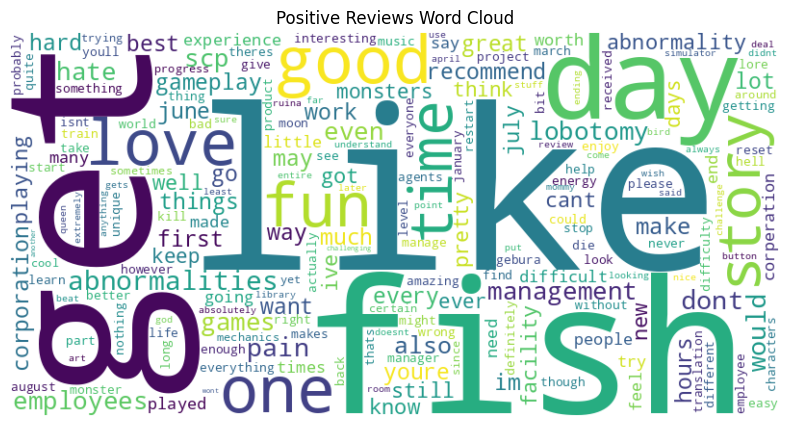

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_pos_lobo['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

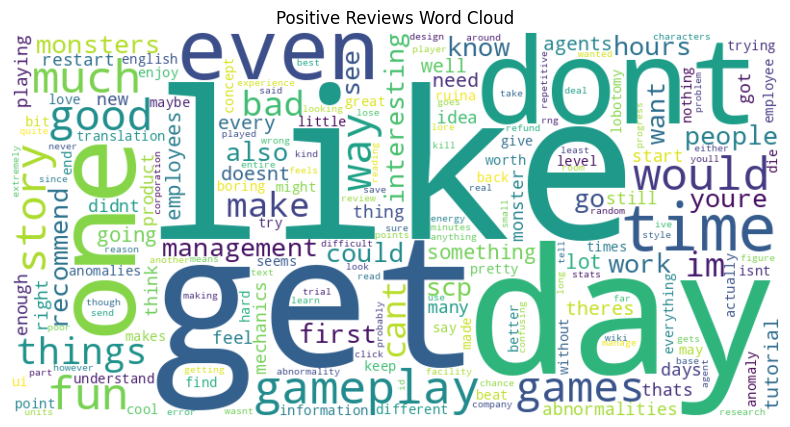

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_neg_lobo['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 공백 제거
    return text

# 불용어 리스트 로드
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set([
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

# 불용어 제거 함수
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# 형태소 분석을 위한 Okt 객체 생성
okt = Okt()

# 한국어 토큰화 함수
def tokenize_korean(text):
    return okt.morphs(text)

# 데이터프레임을 chunk 단위로 처리하는 함수
def process_dataframe_in_chunks(df, chunk_size=1000):
    chunk_list = []
    num_chunks = len(df) // chunk_size + 1

    for i in range(num_chunks):
        chunk = df[i*chunk_size:(i+1)*chunk_size].copy()

        # 텍스트 전처리
        chunk['clean_review'] = chunk['review'].apply(preprocess_korean_text)

        # 한국어 토큰화
        chunk['tokens'] = chunk['clean_review'].apply(tokenize_korean)

        # 불용어 제거
        chunk['tokens'] = chunk['tokens'].apply(remove_stopwords)

        # 각 청크 데이터를 저장
        chunk_list.append(chunk)

    # 모든 청크를 하나의 데이터프레임으로 결합
    return pd.concat(chunk_list, ignore_index=True)

# 청크 단위로 데이터를 처리
ko_pos_lobo_chunked = process_dataframe_in_chunks(ko_pos_lobo, chunk_size=1000)

# 토큰 빈도 분석
all_tokens = [token for sublist in ko_pos_lobo_chunked['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))


java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

# 불용어 제거 함수
def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

# 데이터 분할 및 전처리 함수
def process_batch(df_batch, stop_words):
    # 1. 전처리
    df_batch['clean_review'] = df_batch['review'].apply(preprocess_korean_text)

    # 2. 토큰화
    df_batch['tokens'] = df_batch['clean_review'].apply(tokenize_korean)

    # 3. 불용어 제거
    df_batch['tokens'] = df_batch['tokens'].apply(lambda x: remove_stopwords(x, stop_words))

    return df_batch

# 불용어 리스트 로드
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set([
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

# 데이터 분할
batch_size = 1000  # 한 번에 처리할 데이터 크기
batches = np.array_split(ko_pos_lobo, len(ko_pos_lobo) // batch_size + 1)

# 각 배치 처리
processed_batches = []
for batch in batches:
    processed_batch = process_batch(batch, stop_words)
    processed_batches.append(processed_batch)

# 모든 배치 병합
processed_data = pd.concat(processed_batches)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in processed_data['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))


In [ ]:
def generate_wordcloud(word_freq):
    # 워드 클라우드 설정
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(word_freq)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.show()

# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_neg_lobo['clean_review'] = ko_neg_lobo['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_neg_lobo['tokens'] = ko_neg_lobo['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set( [
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_neg_lobo['tokens'] = ko_neg_lobo['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_neg_lobo['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

In [ ]:
def generate_wordcloud(word_freq):
    # 워드 클라우드 설정
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(word_freq)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.show()

# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
lobo_games = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/lobotomy_games.xls",index_col=0)
lobo_games

In [ ]:
import re

# lobo_games 데이터프레임에서 'title' 컬럼을 리스트로 변환
titles = lobo_games['title'].tolist()

# 게임 제목을 소문자 변환 후 토큰화하는 함수
def preprocess_title(title):
    # 소문자 변환 후 특수문자 제거 및 토큰화 (단어별로 나누기)
    return re.findall(r'\b\w+\b', title.lower())

# 전처리된 제목 리스트
preprocessed_titles = [preprocess_title(title) for title in titles]

# 리뷰에 게임 제목이 포함되어 있는지 확인하는 함수
def contains_game_title(tokens):
    for preprocessed_title in preprocessed_titles:
        # 모든 토큰이 리뷰 내에 포함되었는지 확인
        if all(token in tokens for token in preprocessed_title):
            return True
    return False

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_pos_lobo['contains_game_title'] = en_pos_lobo['tokens'].apply(contains_game_title)
en_pos_lobo['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_neg_lobo['contains_game_title'] = en_neg_lobo['tokens'].apply(contains_game_title)
en_neg_lobo['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_pos_lobo['contains_game_title'] = ko_pos_lobo['tokens'].apply(contains_game_title)
ko_pos_lobo['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_neg_lobo['contains_game_title'] = ko_neg_lobo['tokens'].apply(contains_game_title)
ko_neg_lobo['contains_game_title'].value_counts()

###한국어

# 언소울

In [ ]:
ko_un = un_df[un_df["language"] == "korean"]
en_un = un_df[un_df["language"] == "english"]

en_pos_un = en_un[en_un["review_type"] == "positive"]
en_neg_un = en_un[en_un["review_type"] == "negative"]
ko_pos_un = ko_un[ko_un["review_type"] == "positive"]
ko_neg_un = ko_un[ko_un["review_type"] == "negative"]

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# 영어 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
en_neg_un['clean_review'] = en_neg_un['review'].apply(preprocess_text)
en_pos_un['clean_review'] = en_pos_un['review'].apply(preprocess_text)

# 영어 토큰화
en_neg_un['tokens'] = en_neg_un['clean_review'].apply(word_tokenize)
en_pos_un['tokens'] = en_pos_un['clean_review'].apply(word_tokenize)

# 불용어 리스트
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

en_neg_un['tokens'] = en_neg_un['tokens'].apply(remove_stopwords)
en_pos_un['tokens'] = en_pos_un['tokens'].apply(remove_stopwords)

In [ ]:
irrelevant_words = ['game', 'play', 'yes', 'no', 'run', 'item', 'really']

# 불필요한 단어 제거 함수
def remove_irrelevant_words(tokens):
    return [word for word in tokens if word not in irrelevant_words]

# en_neg_skul과 en_pos_skul에 적용하여 불필요한 단어 제거
en_neg_un['filtered_tokens'] = en_neg_un['tokens'].apply(remove_irrelevant_words)
en_pos_un['filtered_tokens'] = en_pos_un['tokens'].apply(remove_irrelevant_words)

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_pos_un['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

In [ ]:
# 모든 토큰을 결합하여 하나의 리스트로 생성
all_tokens = [word for tokens in en_neg_un['filtered_tokens'] for word in tokens]

# 단어 빈도수 계산
word_freq = Counter(all_tokens)

# 워드클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    # WordCloud 객체 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 빈도수에 따른 워드클라우드 생성
generate_wordcloud(word_freq, 'Positive Reviews Word Cloud')

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_pos_un['clean_review'] = ko_pos_un['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_pos_un['tokens'] = ko_pos_un['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set( [
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_pos_un['tokens'] = ko_pos_un['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_pos_un['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

In [ ]:
def generate_wordcloud(word_freq):
    # 워드 클라우드 설정
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(word_freq)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.show()

# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 한국어 텍스트 전처리 함수
def preprocess_korean_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 문자와 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()  # 공백 제거
    return text

# 전처리 적용
ko_neg_un['clean_review'] = ko_neg_un['review'].apply(preprocess_korean_text)

# 한국어 토큰화
okt = Okt()
def tokenize_korean(text):
    return okt.morphs(text)  # 형태소 단위로 토큰화

ko_neg_un['tokens'] = ko_neg_un['clean_review'].apply(tokenize_korean)

# 불용어 리스트 (예시)
stopwords_file_path = '/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/stopword.txt'

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    file_stop_words = set(line.strip() for line in file)

# 직접 입력한 불용어
direct_stop_words = set( [
    '나', '너', '그', '저', '이것', '저것', '우리', '너희', '당신', '그녀', '그들', '누구', '무엇', '어디', '언제',
    '나의', '너의', '그의', '저의', '우리의', '그들의', '이', '저', '그', '이것', '저것', '하다', '있다', '되다',
    '아니다', '하게', '하게', '한다', '했을', '했다', '하는', '하고', '하고자', '하려면', '하니', '하여', '해야', '했으니',
    '크다', '작다', '좋다', '나쁘다', '있다', '없다', '너무', '매우', '아주', '항상', '자주', '종종', '가끔', '정말',
    '정말로', '이제', '그때', '다시', '또', '그러므로', '그러나', '그리고', '그래서', '하지만', '또는', '만약', '왜냐하면',
    '그렇다면', '또한', '때문에', '뿐', '수', '것', '중', '대로', '경우', '즉', '이렇게', '저렇게', '즉', '처럼', '등', '들', '같이',
    '사실', '모두', '아직', '단지', '만', '거기', '여기', '요즘', '이리저리','스컬','은','도','는','the','게임'
])

# 두 불용어 집합 합치기
stop_words = file_stop_words.union(direct_stop_words)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

ko_neg_un['tokens'] = ko_neg_un['tokens'].apply(remove_stopwords)

# 한국어 단어 빈도 분석
all_tokens = [token for sublist in ko_neg_un['tokens'] for token in sublist]
word_freq = Counter(all_tokens)

# 상위 10개 단어와 빈도 출력
print(word_freq.most_common(10))

In [ ]:
def generate_wordcloud(word_freq):
    # 워드 클라우드 설정
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
        background_color='white',
        width=800,
        height=600
    ).generate_from_frequencies(word_freq)

    # 워드 클라우드 그리기
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.show()

# 상위 단어 빈도로 워드 클라우드 생성
generate_wordcloud(word_freq)

In [ ]:
# lobo_games 데이터프레임에서 'title' 컬럼을 리스트로 변환
titles = un_games['title'].tolist()

# 게임 제목을 소문자 변환 후 토큰화하는 함수
def preprocess_title(title):
    # 소문자 변환 후 특수문자 제거 및 토큰화 (단어별로 나누기)
    return re.findall(r'\b\w+\b', title.lower())

# 전처리된 제목 리스트
preprocessed_titles = [preprocess_title(title) for title in titles]

# 리뷰에 게임 제목이 포함되어 있는지 확인하는 함수
def contains_game_title(tokens):
    for preprocessed_title in preprocessed_titles:
        # 모든 토큰이 리뷰 내에 포함되었는지 확인
        if all(token in tokens for token in preprocessed_title):
            return True
    return False


In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_pos_un['contains_game_title'] = en_pos_un['tokens'].apply(contains_game_title)
en_pos_un['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
en_neg_un['contains_game_title'] = en_neg_un['tokens'].apply(contains_game_title)
en_neg_un['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_pos_un['contains_game_title'] = ko_pos_un['tokens'].apply(contains_game_title)
ko_pos_un['contains_game_title'].value_counts()

In [ ]:
# 'tokens' 컬럼에 대해 게임 제목이 포함되어 있는지 여부 확인
ko_neg_un['contains_game_title'] = ko_neg_un['tokens'].apply(contains_game_title)
ko_neg_un['contains_game_title'].value_counts()

In [ ]:
review = pd.read_csv("/content/drive/MyDrive/ASAC 빅데이터 6기/STEAM 분석/review-1-1-1.csv",index_col=0)

In [ ]:
review['year']

In [ ]:
review['year'] = review['year'].astype('Int64')  # Convert to integer with support for NaN

# Filter years between 2016 and 2024 inclusive
review_1 = review[review['year'].between(2016, 2024, inclusive='both')]

In [ ]:
review_1

In [ ]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Map month names to numbers using the dictionary
review_1['month'] = review_1['month'].map(month_mapping)

# Remove rows where 'month' is NaN (i.e., non-month values)
review_1 = review_1.dropna(subset=['month'])

# Convert 'month' to integer
review_1['month'] = review_1['month'].astype(int)

review_1

In [ ]:
review_1['year_month'] = review_1['year'].astype(str) + '-' + review_1['month'].astype(str).str.zfill(2)

review_1

In [ ]:
review_1.to_csv("final_review.csv")

In [ ]:
review_1[(review_1['year_month'] == '2023-07') & (review_1['game'] == 'lobotomy') ]